In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sklearn.preprocessing import StandardScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings("ignore", category=FutureWarning)        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv")

In [3]:
train.head()


,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
0,2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,Clear,63,0
1,2021-01-01 00:00:00,90.000000,80,30.000000,1.0,car,Clear,53,0
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,auto,Clear,35,0
3,2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,Stormy,83,0
4,2021-01-01 01:00:00,90.969805,98,30.000000,1.0,car,Clear,26,0


# DA HACKATHON - 2 
## TEAM: THE OUTLIERS
## NAMES:
* Nikita Anup - PES2UG22CS361 - SEM-V-'F'
* Princia D'Souza - PES2UG22CS416 - SEM-V-'G'
* Parvathi Prakash - PES2UG22CS384 - SEM-V-'G'
* Rasika Sharma - PES2UG22CS435 - SEM'V'-G'
## CAMPUS: EC CAMPUS




### Task 1: Data Exploration and Preparation (1 mark)

- Conduct exploratory data analysis to identify trends, patterns, and anomalies in fare data for each vehicle type (bikes, autos, and cars) in Quahog City.
- Using appropriate visualizations and techniques, provide an in-depth analysis on the nature of the average fare and other features in the dataset.

In [4]:
print(train.columns)


Index(['timestamp', 'average_fare', 'rides_completed', 'driver_availability',
       'surge_multiplier', 'vehicle_type', 'weather', 'traffic_index',
       'special_event'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63015 entries, 0 to 63014
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            63015 non-null  object 
 1   average_fare         63015 non-null  float64
 2   rides_completed      63015 non-null  int64  
 3   driver_availability  63015 non-null  float64
 4   surge_multiplier     63015 non-null  float64
 5   vehicle_type         63015 non-null  object 
 6   weather              63015 non-null  object 
 7   traffic_index        63015 non-null  int64  
 8   special_event        63015 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 4.3+ MB
None
       average_fare  rides_completed  driver_availability  surge_multiplier  \
count  63015.000000     63015.000000         63015.000000      63015.000000   
mean      70.186256       376.739760            44.695420          1.253939   
std       39.465587       302.994799  

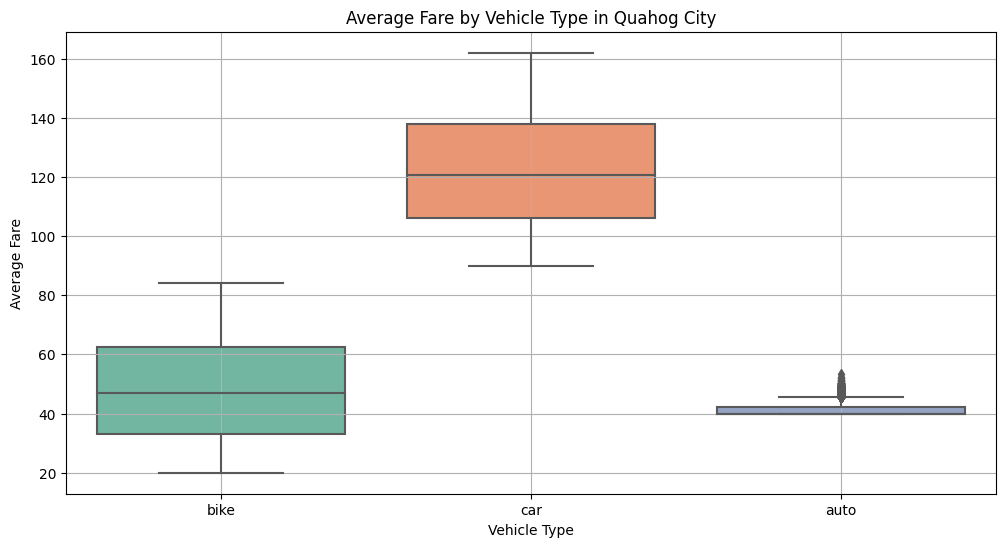

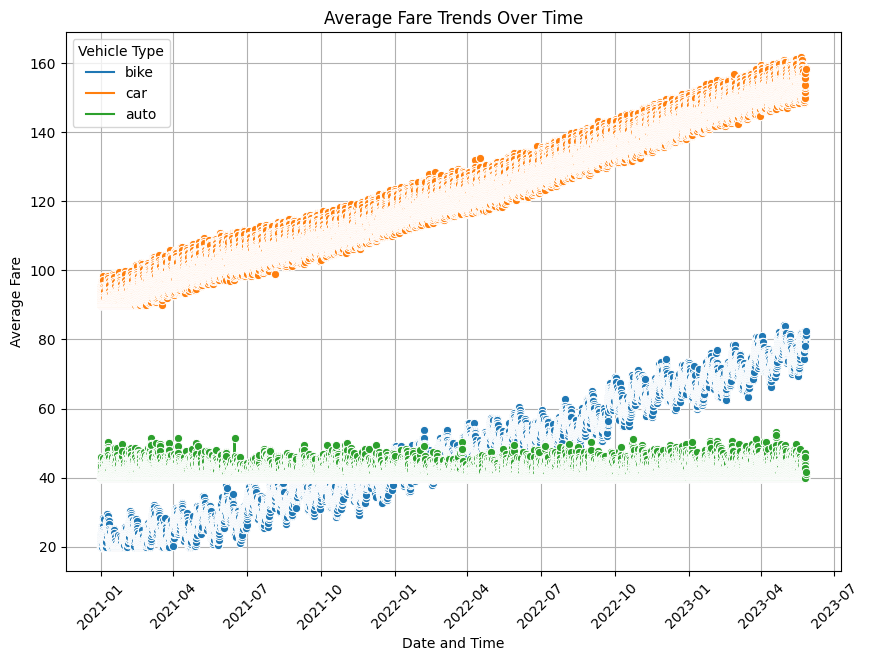

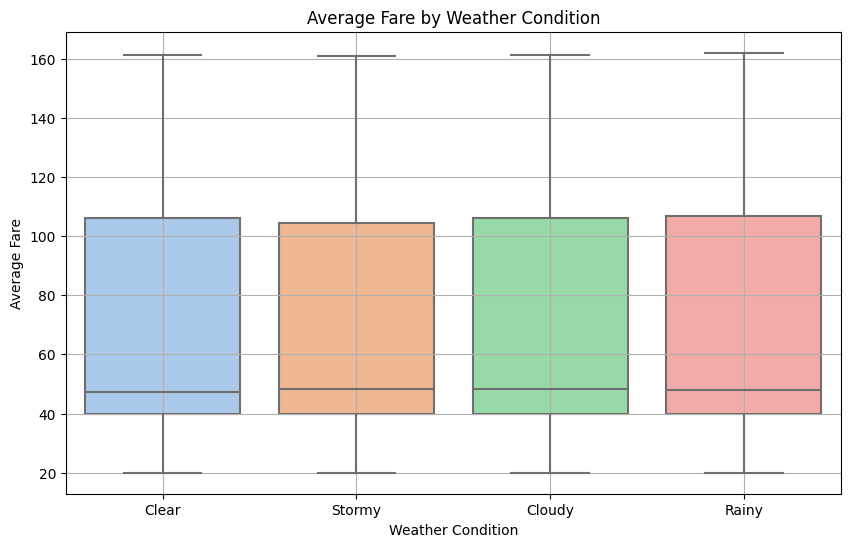

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print(train.info())
print(train.describe())

print(train.isnull().sum())
print(test.isnull().sum())

train.dropna(inplace=True)
test.dropna(inplace=True)

train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])



plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='vehicle_type', y='average_fare', palette='Set2')
plt.title('Average Fare by Vehicle Type in Quahog City')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Fare')
plt.grid()
plt.show()


plt.figure(figsize=(10, 7))
sns.lineplot(data=train, x='timestamp', y='average_fare', hue='vehicle_type', marker='o')
plt.title('Average Fare Trends Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Average Fare')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Vehicle Type')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='weather', y='average_fare', palette='pastel')
plt.title('Average Fare by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Fare')
plt.grid()
plt.show()


The output offer a data overview and analysis of taxi fare trends in "Quahog City" based on several factors like vehicle type, weather, and timestamp. 

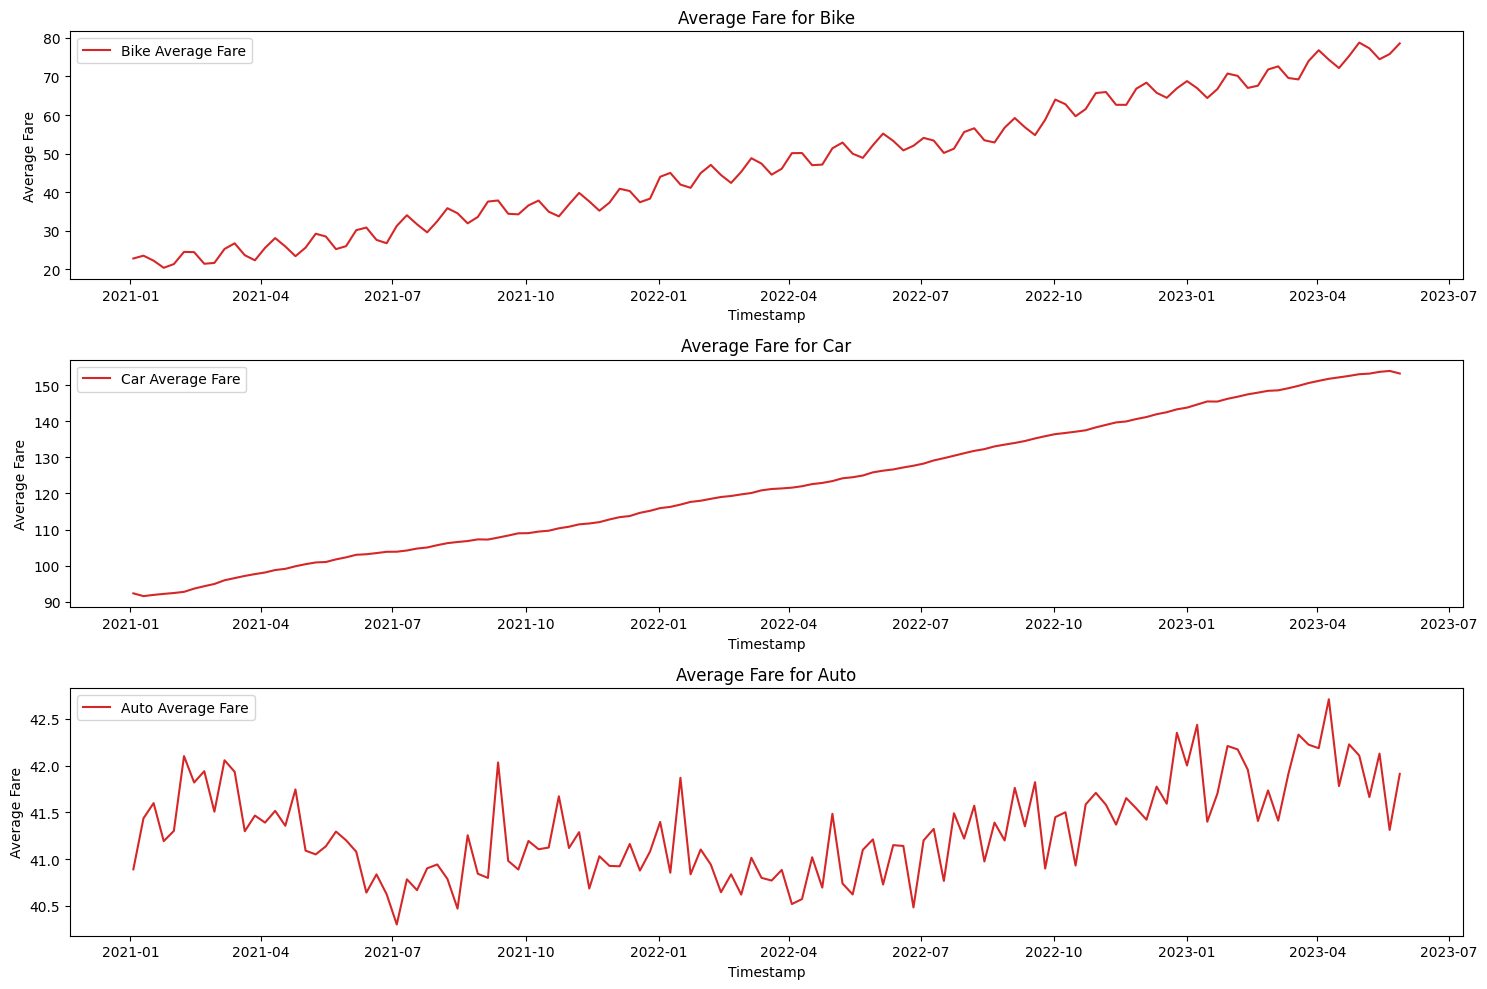

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_fare_by_vehicle_type(df, x, y, vehicle_types, title_prefix="Average Fare for", freq='W'):
    
    df[x] = pd.to_datetime(df[x])

    plt.figure(figsize=(15, 10), dpi=100)

    for i, vehicle in enumerate(vehicle_types, 1):
        df_vehicle = df[df['vehicle_type'] == vehicle].set_index(x)  
        df_vehicle_resampled = df_vehicle[y].resample(freq).mean() 

        plt.subplot(len(vehicle_types), 1, i)
        plt.plot(df_vehicle_resampled.index, df_vehicle_resampled, label=f"{vehicle.capitalize()} Average Fare", color='tab:red')
        plt.title(f"{title_prefix} {vehicle.capitalize()}")
        plt.xlabel('Timestamp')
        plt.ylabel('Average Fare')
        plt.legend()

    plt.tight_layout()
    plt.show()


vehicle_types = ['bike', 'car', 'auto']
plot_fare_by_vehicle_type(train, x='timestamp', y='average_fare', vehicle_types=vehicle_types)


    From the above graph it is observed that,
    - The Average fare for bike shows an upward trend with strong consistent seasonality.
    - The Average fare for car shows an upward trend.
    - The Average fare for auto does not show any clear patterns or trends. 

    

In [7]:

train = pd.get_dummies(train, columns=['vehicle_type', 'weather'])
test = pd.get_dummies(test, columns=['vehicle_type', 'weather'])


bool_cols_train = train.select_dtypes(include='bool').columns
bool_cols_test = test.select_dtypes(include='bool').columns

train[bool_cols_train] = train[bool_cols_train].astype(int)
test[bool_cols_test] = test[bool_cols_test].astype(int)


numerical_features = ['rides_completed', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event']


scaler = StandardScaler()


train[numerical_features] = scaler.fit_transform(train[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])  # Important: use transform only



ytrain = train['average_fare']
Xtrain = train.drop(['average_fare'], axis=1)  
                  
Xtest = test


print(Xtrain.head())


            timestamp  rides_completed  driver_availability  surge_multiplier  \
0 2021-01-01 00:00:00         0.264892             0.292101         -0.980211   
1 2021-01-01 00:00:00        -0.979364            -0.959116         -0.980211   
2 2021-01-01 00:00:00        -0.454598            -0.364526         -0.980211   
3 2021-01-01 01:00:00        -0.778039            -0.959116          0.949802   
4 2021-01-01 01:00:00        -0.919956            -0.959116         -0.980211   

   traffic_index  special_event  vehicle_type_auto  vehicle_type_bike  \
0       0.150528      -0.333877                  0                  1   
1      -0.281391      -0.333877                  0                  0   
2      -1.058845      -0.333877                  1                  0   
3       1.014366      -0.333877                  0                  1   
4      -1.447573      -0.333877                  0                  0   

   vehicle_type_car  weather_Clear  weather_Cloudy  weather_Rainy  \
0    

### Task 2: Time Series Characterization (1 mark)

- Building on your exploratory analysis, examine the time series characteristics of the average fare for each vehicle type in Quahog City.
- Implement the Holt and Holt-Winters methods to model and forecast the average fare for each vehicle type.
- Interpret the results and discuss the implications for RideWave's business.

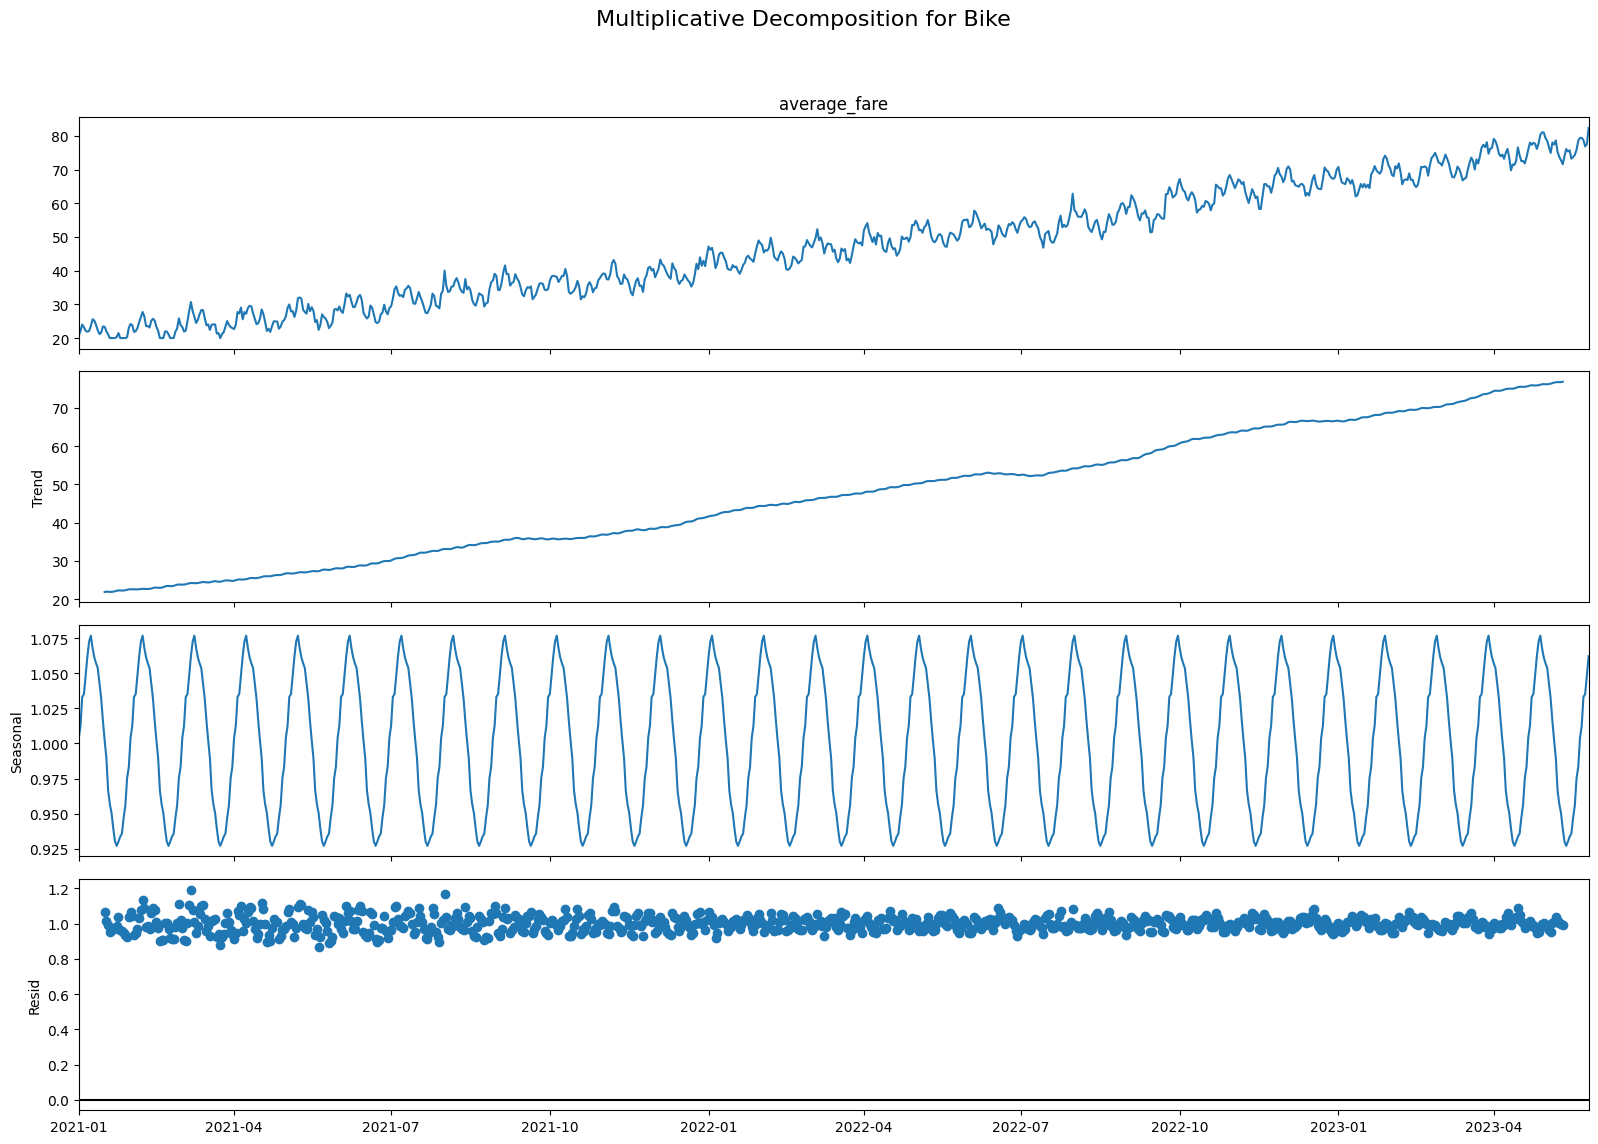

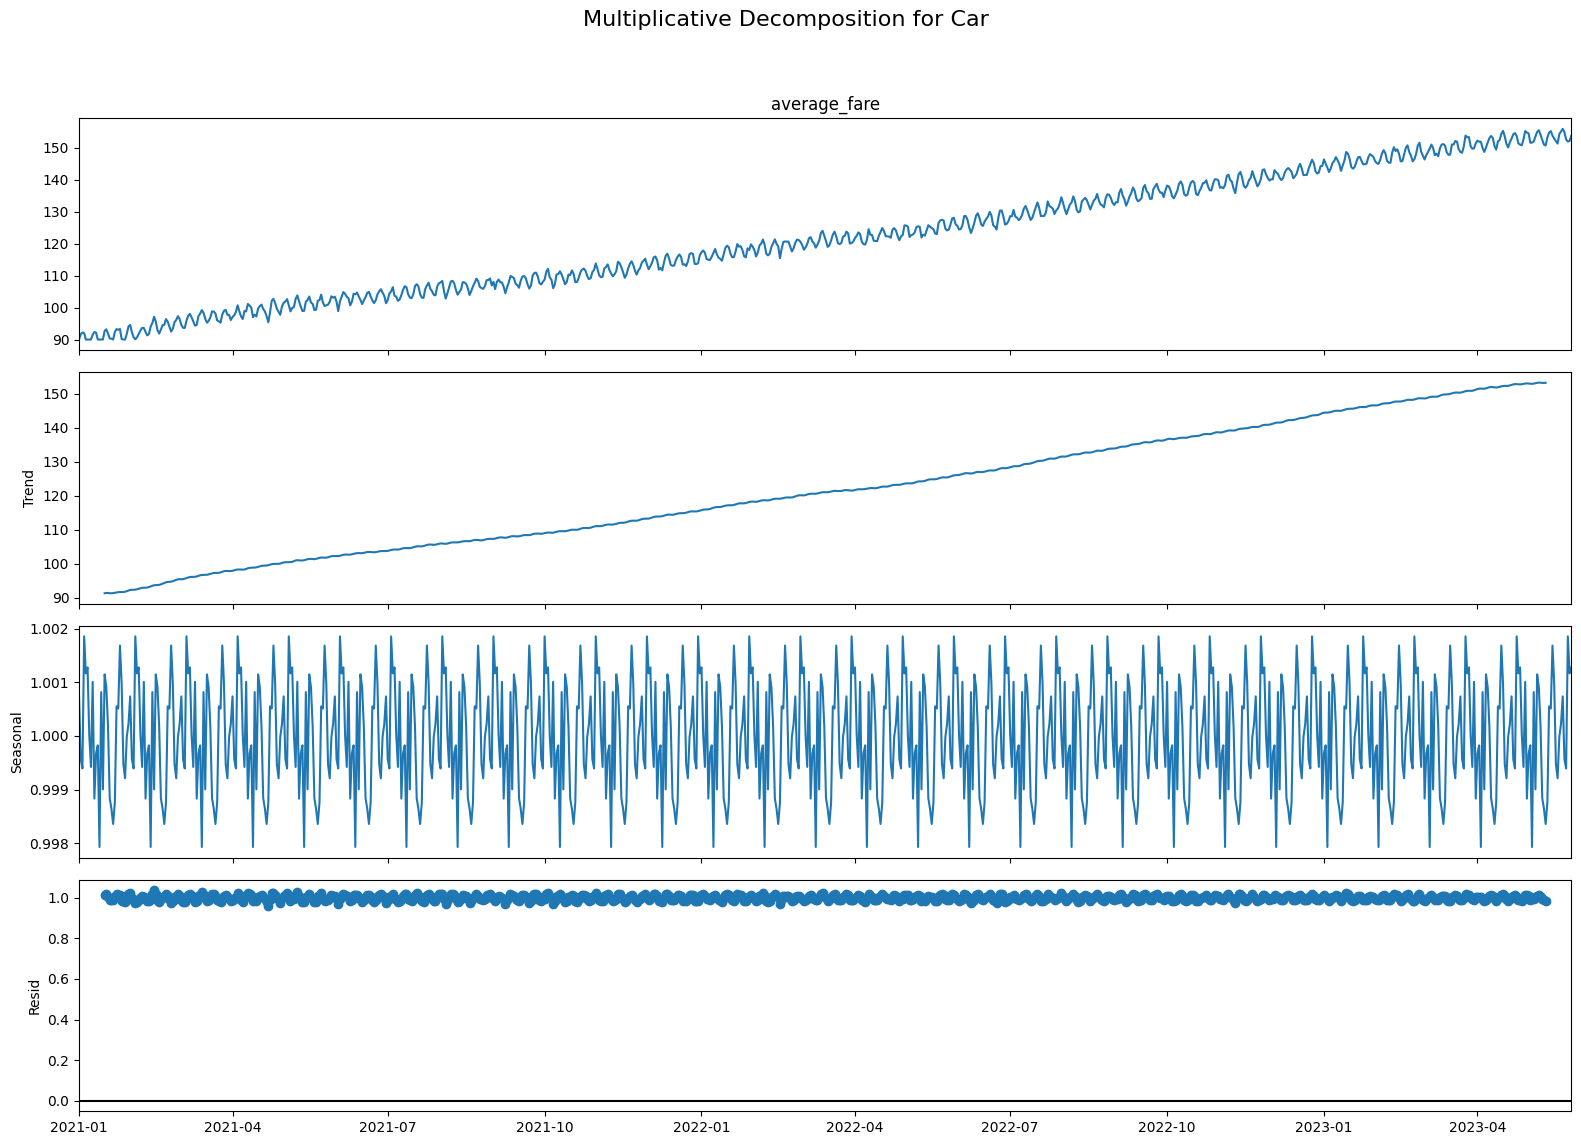

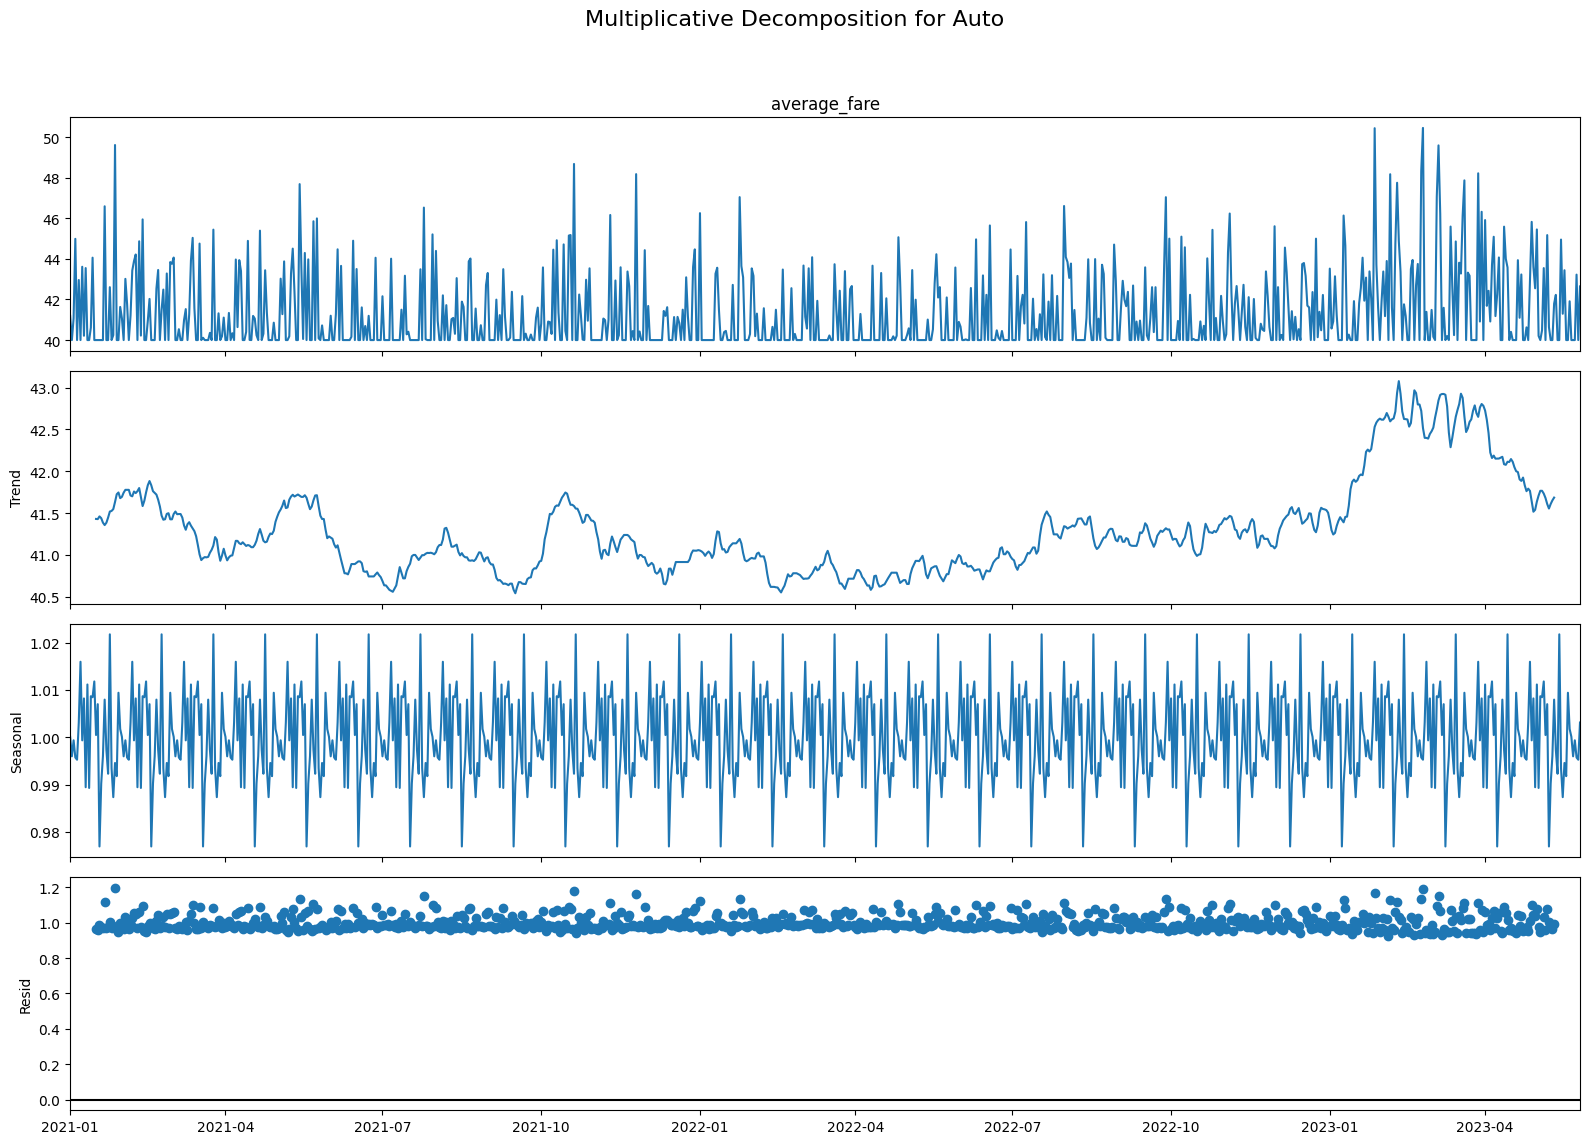

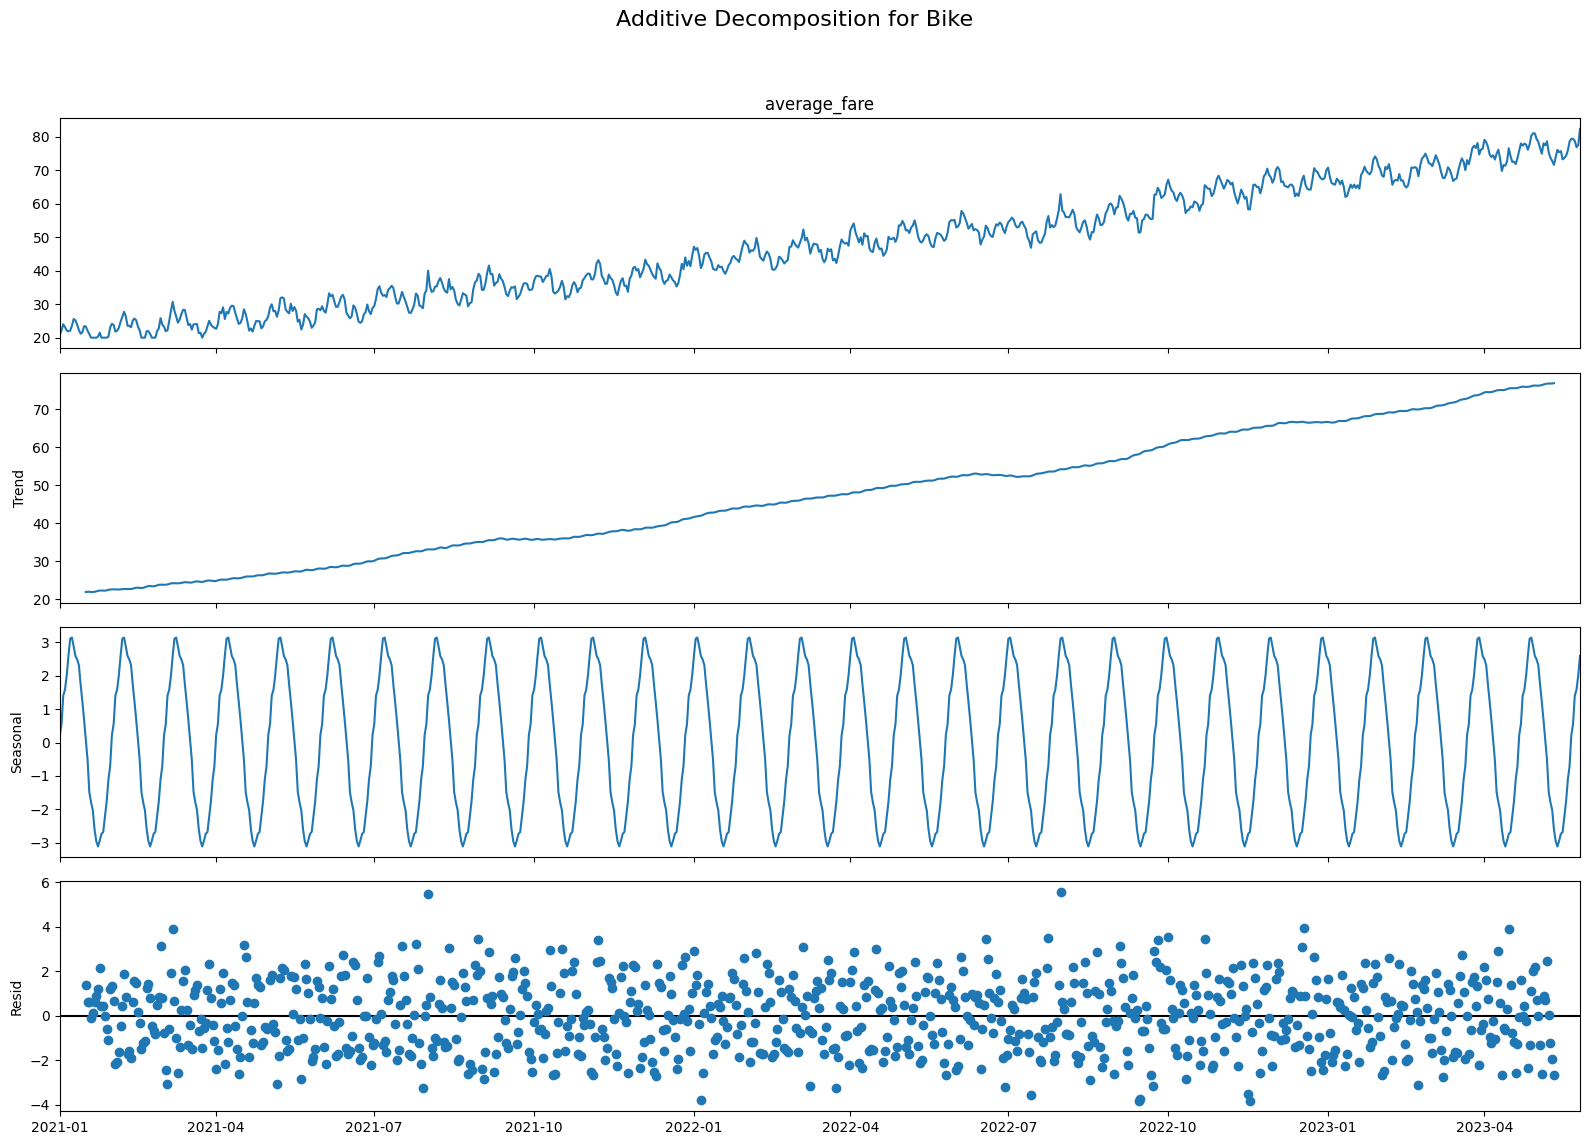

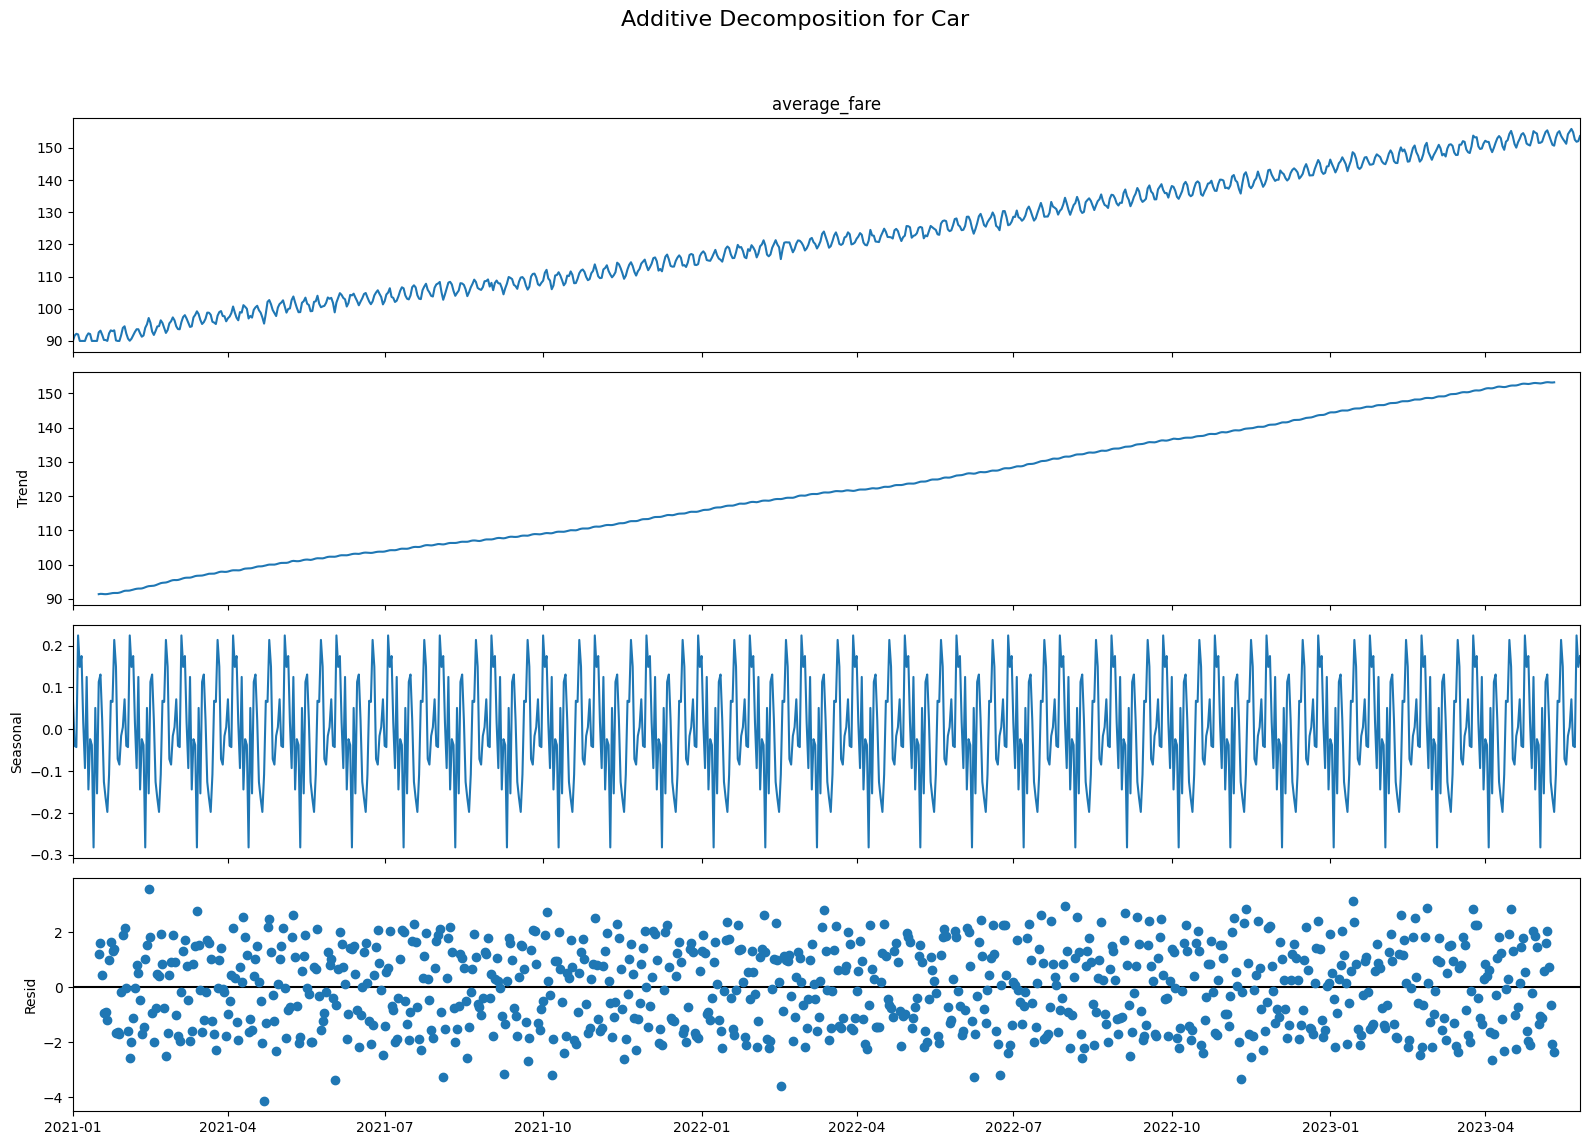

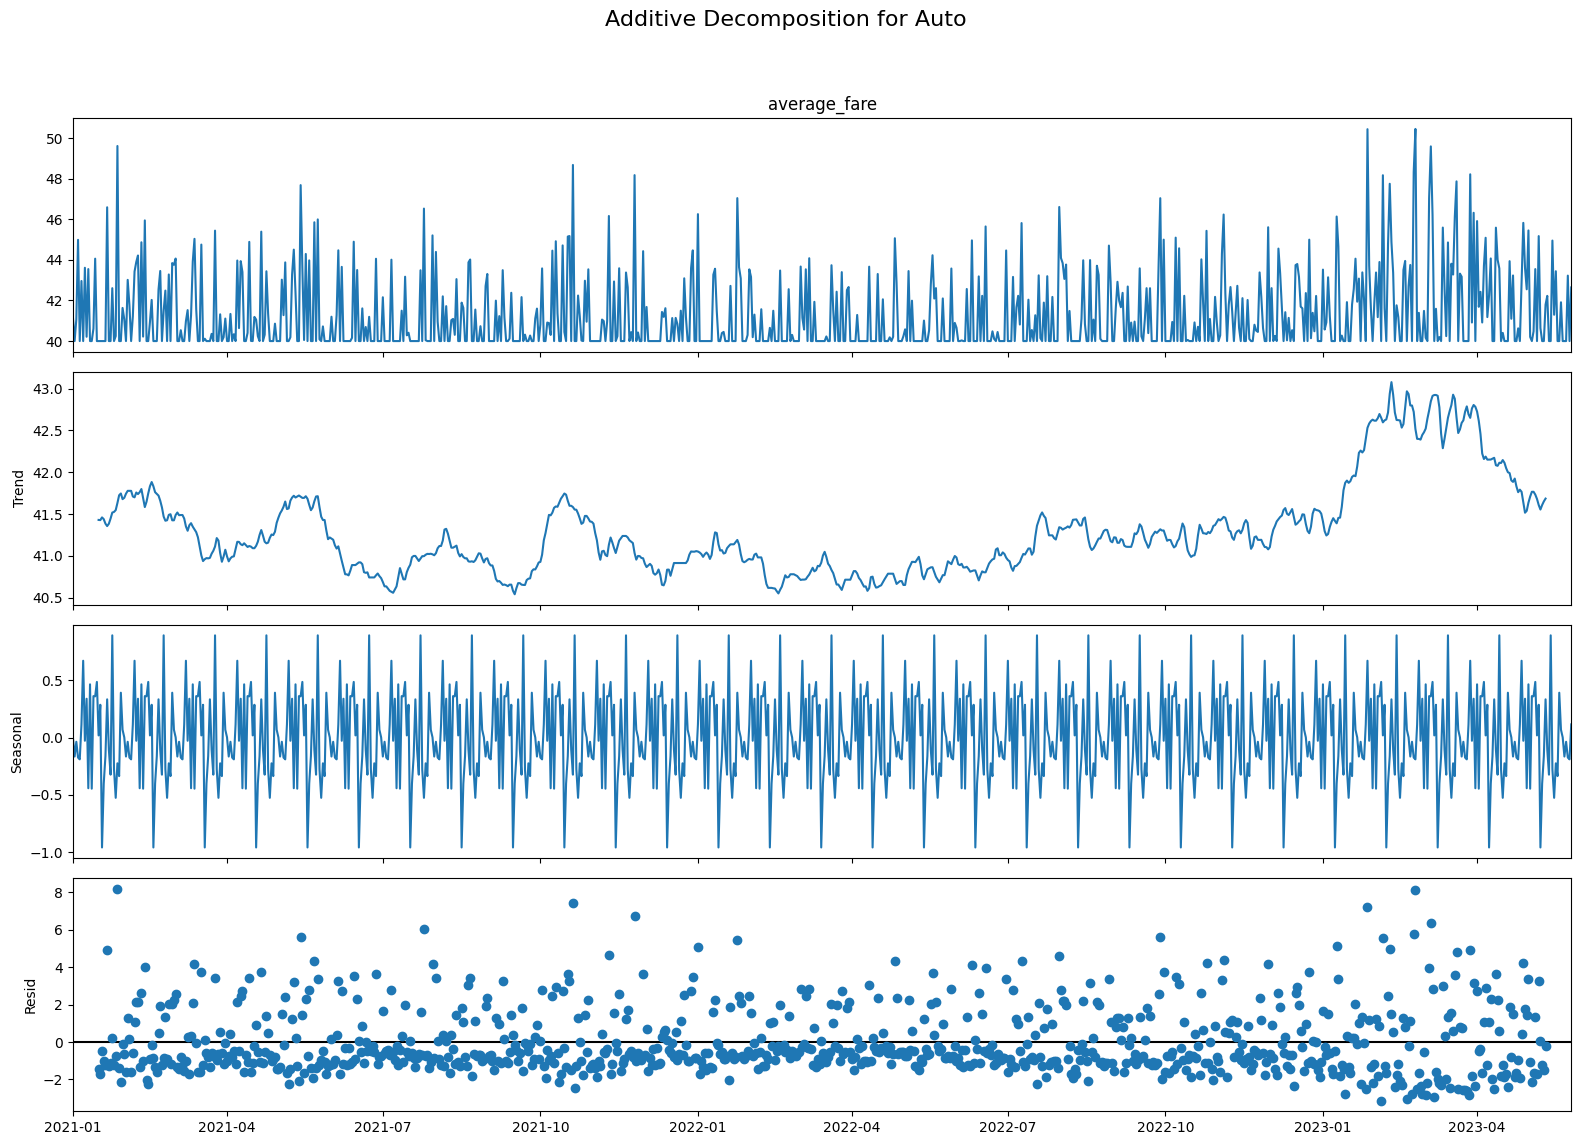

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def plot_seasonal_decomposition(df, y, vehicle_types, model='multiplicative', period=30):
    for vehicle in vehicle_types:
        
        vehicle_column = f'vehicle_type_{vehicle}'
        
        
        df_vehicle = df[df[vehicle_column] == 1].set_index('timestamp')
        df_vehicle = df_vehicle.asfreq('D')  

      
        decomposition = seasonal_decompose(df_vehicle[y], model=model, period=period)

       
        plt.rcParams.update({'figure.figsize': (16, 12)})
        decomposition.plot().suptitle(f'{model.capitalize()} Decomposition for {vehicle.capitalize()}', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

vehicle_types = ['bike', 'car', 'auto']
plot_seasonal_decomposition(train, y='average_fare', vehicle_types=vehicle_types, model='multiplicative', period=30)
plot_seasonal_decomposition(train, y='average_fare', vehicle_types=vehicle_types, model='additive', period=30)


From the above graphs, the following interpretations can be made:
- **BIKE**:
  In the multiplicative and additive models, an upward trend is observed indicating a consistent increase in average fares.
  Over the period of 30 days, it is observed that there is a seasonal component present in the data, as there are conistent peaks and troughs through the graph at regular intervals on a daily basis, indicating that there is a spike in the bookings especially during the weekdays when maximum people commute.
  The residual component appears random and and shows no discernable pattern, indicating the errors are not constant.
  The residuals are especially scattered in the additive model.

- **CAR**:
  In the multiplicative and additive models, an upward trend is observed indicating a consistent increase in average fares of cars.
  It is observed that there is a seasonal component present in the data, as there are conistent peaks and troughs through the graph at regular intervals on a daily basis. Unlike the model for bikes, the peaks and troughs are smoother and more consistent, indicating that the average fare remains high throughout the week and hence the month.
  The residual component appears random and and shows no discernable pattern, indicating the errors are not constant.
  The residuals are especially scattered in the additive model.

- **AUTO**:
  In the multiplicative and additive models, there is no clear trend discernable from the plot. There are inconsistent troughs and peaks throughout the plot, and there is a slight decrease in bookings during the summer, indicating that most people leave the city and do not require autos for daily commute.
  The seasonal component is very prominent, indicating the demand for autos are consistently high on an hourly basis.
  

In [9]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


def adf_test_per_vehicle_type(df):
  
    vehicle_types = ['vehicle_type_bike', 'vehicle_type_car', 'vehicle_type_auto']
    results = {}
    
    for vehicle in vehicle_types:
       
        df_vehicle = df[df[vehicle] == 1]
        fare_data = df_vehicle['average_fare'].dropna()  
        
        
        if len(fare_data) > 0:
            adf_test = adfuller(fare_data)
            results[vehicle] = {
                'ADF Statistic': adf_test[0],
                'p-value': adf_test[1],
                'Critical Values': adf_test[4],
                'Stationary': adf_test[1] < 0.05 
            }
   
    return pd.DataFrame(results)


adf_results = adf_test_per_vehicle_type(train)


print(adf_results)


                                                 vehicle_type_bike  \
ADF Statistic                                             -1.55755   
p-value                                                   0.504875   
Critical Values  {'1%': -3.4306620575014812, '5%': -2.861677918...   
Stationary                                                   False   

                                                  vehicle_type_car  \
ADF Statistic                                            -1.861944   
p-value                                                    0.35017   
Critical Values  {'1%': -3.4306620575014812, '5%': -2.861677918...   
Stationary                                                   False   

                                                 vehicle_type_auto  
ADF Statistic                                           -20.739513  
p-value                                                        0.0  
Critical Values  {'1%': -3.4306618194195084, '5%': -2.861677813...  
Stationary            

* The ADF statistic is greater than the critical values at significance levels (eg. 5%), and the p-value (0.504875) is much higher than 0.05. This indicates that the null hypothesis cannot be rejected (presence of a unit root), which implies that the time series for bike fares is non-stationary.

*  The ADF statistic is greater than the critical values at significance levels (eg. 5%), and the p-value (0.35017) is greater than 0.05.This indicates that the null hypothesis cannot be rejected (presence of a unit root), which implies that the time series for car fares is also non-stationary.

*  The ADF statistic is significantly lower than the critical values at all significance levels, and the p-value (0.0) is less than 0.05. Therefore,  the null hypothesis is rejected , which implies that the auto fares time series is stationary.



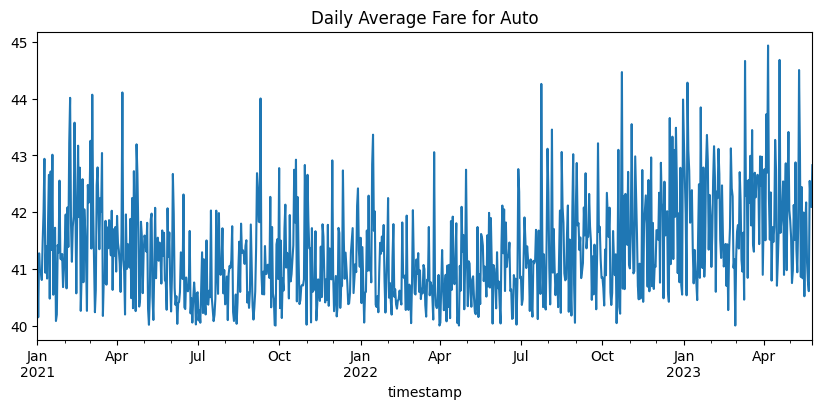

/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


                       ExponentialSmoothing Model Results                       
Dep. Variable:             average_fare   No. Observations:                  876
Model:             ExponentialSmoothing   SSE                            580.434
Optimized:                         True   AIC                           -338.553
Trend:                         Additive   BIC                           -286.024
Seasonal:                      Additive   AICC                          -338.131
Seasonal Periods:                     7   Date:                 Sat, 02 Nov 2024
Box-Cox:                          False   Time:                         08:41:57
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0438187                alpha                 True
smoothing_trend          

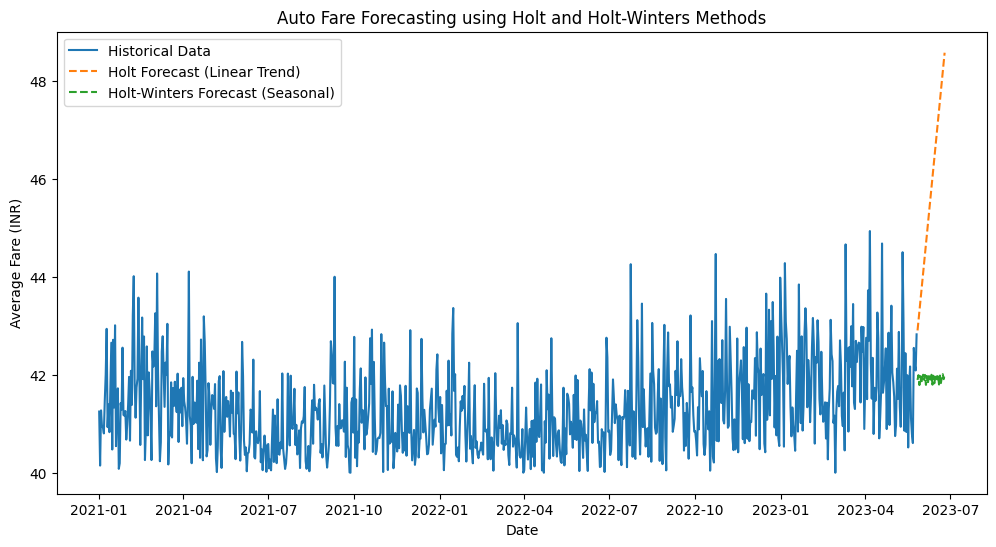

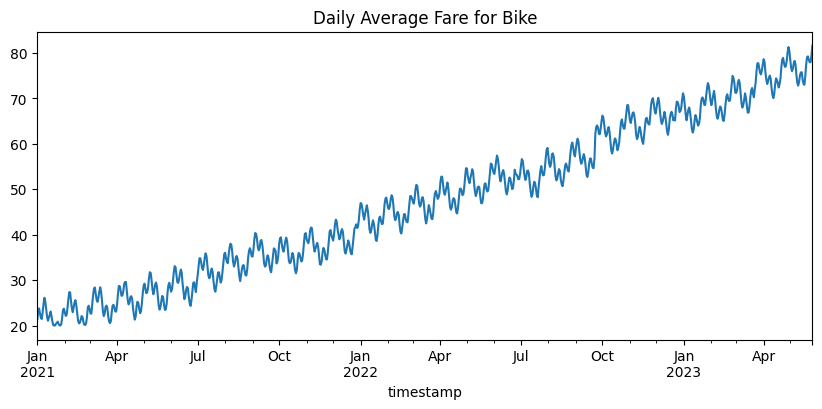

/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


                       ExponentialSmoothing Model Results                       
Dep. Variable:             average_fare   No. Observations:                  876
Model:             ExponentialSmoothing   SSE                            180.433
Optimized:                         True   AIC                          -1362.086
Trend:                         Additive   BIC                          -1309.557
Seasonal:                      Additive   AICC                         -1361.664
Seasonal Periods:                     7   Date:                 Sat, 02 Nov 2024
Box-Cox:                          False   Time:                         08:41:58
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7367114                alpha                 True
smoothing_trend          

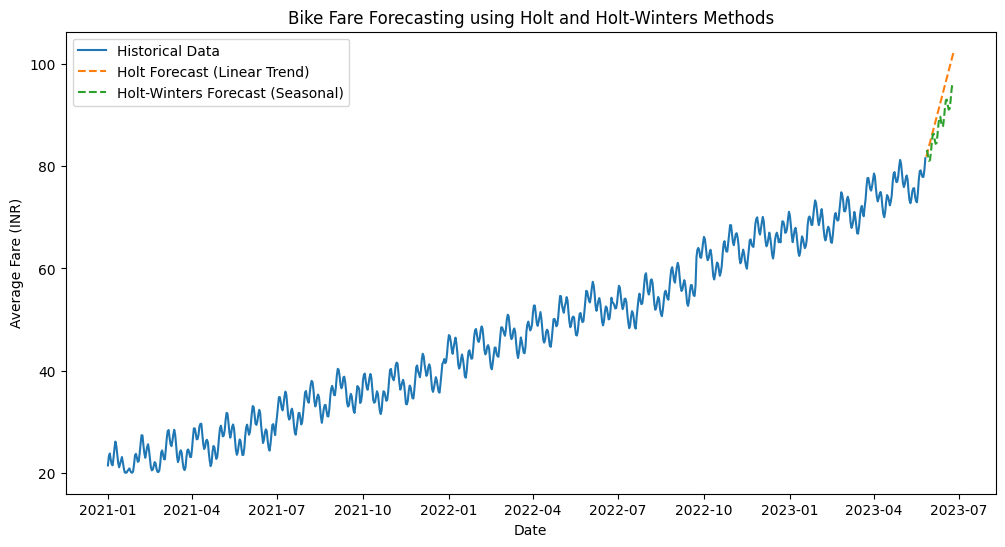

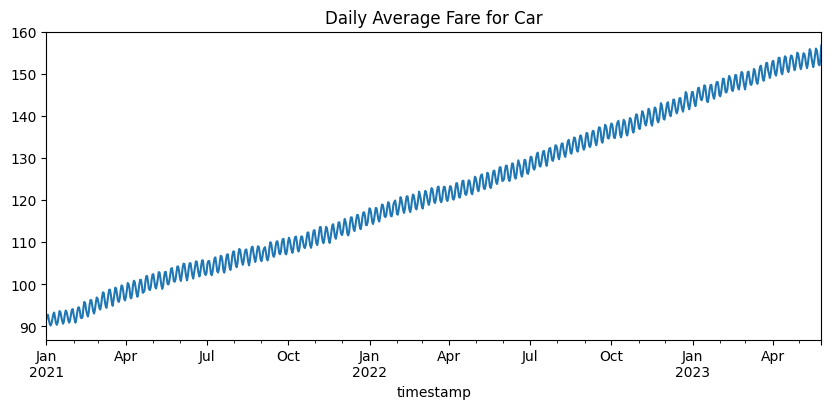

/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


                       ExponentialSmoothing Model Results                       
Dep. Variable:             average_fare   No. Observations:                  876
Model:             ExponentialSmoothing   SSE                             42.214
Optimized:                         True   AIC                          -2634.578
Trend:                         Additive   BIC                          -2582.049
Seasonal:                      Additive   AICC                         -2634.156
Seasonal Periods:                     7   Date:                 Sat, 02 Nov 2024
Box-Cox:                          False   Time:                         08:41:59
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4644621                alpha                 True
smoothing_trend          

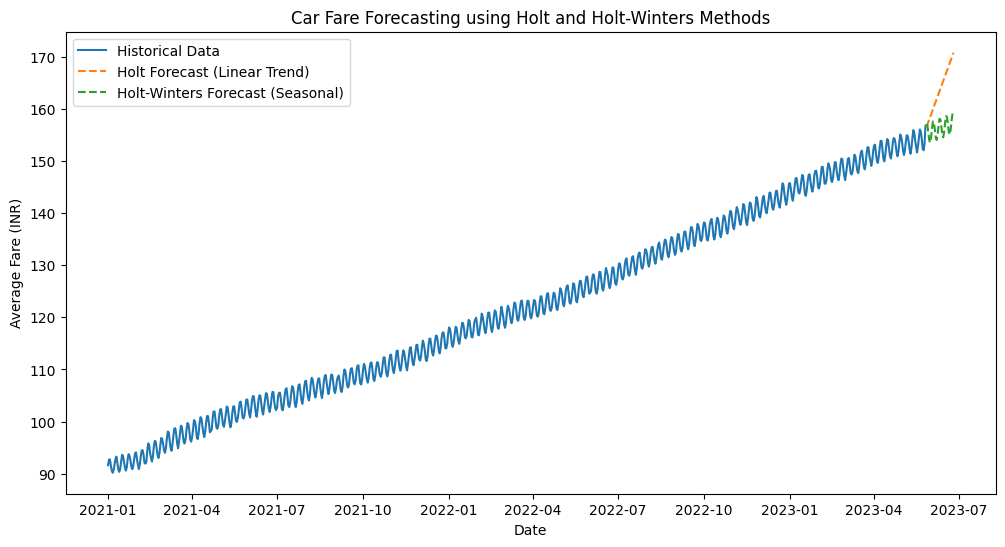


Vehicle Type: Auto
Holt Forecast (first 5 days):
 2023-05-27    42.907272
2023-05-28    43.102912
2023-05-29    43.298551
2023-05-30    43.494190
2023-05-31    43.689829
Freq: D, dtype: float64
Holt-Winters Forecast (first 5 days):
 2023-05-27    41.895585
2023-05-28    41.993080
2023-05-29    41.791263
2023-05-30    41.972769
2023-05-31    41.820011
Freq: D, dtype: float64

Vehicle Type: Bike
Holt Forecast (first 5 days):
 2023-05-27    81.870346
2023-05-28    82.572541
2023-05-29    83.274736
2023-05-30    83.976930
2023-05-31    84.679125
Freq: D, dtype: float64
Holt-Winters Forecast (first 5 days):
 2023-05-27    82.908440
2023-05-28    83.011629
2023-05-29    81.873705
2023-05-30    81.054648
2023-05-31    81.223458
Freq: D, dtype: float64

Vehicle Type: Car
Holt Forecast (first 5 days):
 2023-05-27    156.493211
2023-05-28    156.986037
2023-05-29    157.478862
2023-05-30    157.971688
2023-05-31    158.464513
Freq: D, dtype: float64
Holt-Winters Forecast (first 5 days):
 2023-0

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import Holt

vehicle_type_columns = [col for col in train.columns if col.startswith('vehicle_type_')]
forecasts = {}
forecast_horizon = 30


for vehicle_col in vehicle_type_columns:
  
    vehicle_data = train[train[vehicle_col] == 1].set_index('timestamp')['average_fare'].resample('D').mean()
    vehicle_data = vehicle_data.dropna()  

   
    vehicle_type_name = vehicle_col.replace('vehicle_type_', '').capitalize()
    vehicle_data.plot(title=f"Daily Average Fare for {vehicle_type_name}", figsize=(10, 4))
    plt.show()

    
    holt_model = Holt(vehicle_data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)
    holt_forecast = holt_model.forecast(forecast_horizon)  

 
    holt_winters_model = ExponentialSmoothing(
        vehicle_data, trend='add', seasonal='add', seasonal_periods=7
    ).fit()
    holt_winters_forecast = holt_winters_model.forecast(forecast_horizon)  
    print(holt_winters_model.summary())
  
    plt.figure(figsize=(12, 6))
    plt.plot(vehicle_data.index, vehicle_data, label="Historical Data")
    plt.plot(holt_forecast.index, holt_forecast, label="Holt Forecast (Linear Trend)", linestyle='--')
    plt.plot(holt_winters_forecast.index, holt_winters_forecast, label="Holt-Winters Forecast (Seasonal)", linestyle='--')
    plt.title(f"{vehicle_type_name} Fare Forecasting using Holt and Holt-Winters Methods")
    plt.xlabel("Date")
    plt.ylabel("Average Fare (INR)")
    plt.legend()
    plt.show()

    
    forecasts[vehicle_type_name] = {
        'holt': holt_forecast,
        'holt_winters': holt_winters_forecast
    }


for vehicle_type_name, forecast in forecasts.items():
    print(f"\nVehicle Type: {vehicle_type_name}")
    print("Holt Forecast (first 5 days):\n", forecast['holt'].head())
    print("Holt-Winters Forecast (first 5 days):\n", forecast['holt_winters'].head())


## MODEL PERFORMANCE:

**AUTO**:


- **SSE (580.434)**: Indicates low residual error, suggesting the model captures the underlying patterns reasonably well.

- **AIC (-338.553) and BIC (-286.024)**: These low values suggest a good fit with minimal complexity, balancing accuracy and simplicity.


- **Smoothing Level (α = 0.0438)**: Low value implies stability in average fare, with minimal responsiveness to recent fluctuations.

- **Smoothing Trend (β ≈ 0)**: Near-zero trend indicates no strong upward or downward trends in the data.

- **Smoothing Seasonal (γ ≈ 0)**: Low seasonal smoothing suggests consistent weekly patterns without major fluctuations.

- **Weekly Seasonality**: Minor daily variations, showing a stable weekly pattern without significant changes.


This model is well-suited for stable, predictable data with minimal trend or seasonal volatility, making it effective for forecasting consistent patterns but potentially less responsive to dynamic shifts in fare behavior.

**BIKE**:

- **SSE (180.433)**: Low error value indicates that the model captures the data's variability effectively, suggesting good fit quality.

- **AIC (-1362.086) and BIC (-1309.557)**: These low values indicate a well-fitted model with relatively low complexity, supporting its robustness for forecasting.

- **Smoothing Level (α = 0.7367)**: Higher value shows the model adjusts quickly to recent changes, suggesting more sensitivity to short-term fluctuations in average fare.

- **Smoothing Trend (β = 0.7367)**: Indicates a significant trend component, implying that the data shows some directional change over time.

- **Smoothing Seasonal (γ = 0.1202)**: Moderate value suggests a stable seasonal pattern with some minor adjustments for variability.


- **Initial Level (20.31)**: Establishes the baseline for average fare predictions for the bike category.

- **Weekly Seasonality**: The seasonal components capture daily fluctuations in average fare across a 7-day cycle, indicating predictable changes on different days.


This model is well-suited for data with noticeable trends and stable weekly seasonality, making it effective for applications where recent trends and day-specific patterns are important for accurate forecasts.

**CAR:**

- **SSE (42.214)**: Very low error, indicating the model effectively captures the data’s variability, which reflects high accuracy in predicting average fare values.

- **AIC (-2634.578) and BIC (-2582.049)**: Extremely low values show that the model is efficient with low complexity, reinforcing its robustness for forecast reliability.

- **Smoothing Level (α = 0.4645)**: Moderate value suggests the model balances between short-term changes and longer-term patterns, allowing a stable view of average fare without overreacting to recent fluctuations.

- **Smoothing Trend (β = 0.0)**: Indicates no significant trend component, suggesting that average fare does not display a directional trend over time.

- **Smoothing Seasonal (γ = 0.0317)**: Low value shows minimal adjustments to seasonal effects, suggesting a relatively stable seasonal pattern without much variability.

- **Initial Level (90.97)**: Establishes a high baseline for the average fare, reflecting the primary level for forecasting.

- **Weekly Seasonality**: Seasonal coefficients indicate variations across a 7-day cycle, with higher values on certain days (e.g., s.1 and s.2) and lower values on others (e.g., s.4 and s.5), suggesting predictable fare fluctuations throughout the week.


This model is ideal for data with a stable baseline and consistent weekly patterns. It captures seasonality effectively, making it well-suited for situations where regular weekly patterns are key to forecasting average fares.



In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


evaluation_results_holt = {}
evaluation_results_holt_winters = {}


forecast_horizon = 30

for vehicle_col in forecasts.keys():
    
    actual_data = train[train[f'vehicle_type_{vehicle_col.lower()}'] == 1].set_index('timestamp')['average_fare'].resample('D').mean()
    actual = actual_data[-forecast_horizon:]  

    holt_forecast = forecasts[vehicle_col]['holt']
    mae_holt = mean_absolute_error(actual, holt_forecast)
    rmse_holt = np.sqrt(mean_squared_error(actual, holt_forecast))
    evaluation_results_holt[vehicle_col] = {
        'MAE': mae_holt,
        'RMSE': rmse_holt
    }

    
    holt_winters_forecast = forecasts[vehicle_col]['holt_winters']
    mae_hw = mean_absolute_error(actual, holt_winters_forecast)
    rmse_hw = np.sqrt(mean_squared_error(actual, holt_winters_forecast))
    evaluation_results_holt_winters[vehicle_col] = {
        'MAE': mae_hw,
        'RMSE': rmse_hw
    }


print("\nEvaluation Results for Holt Forecasts:")
for vehicle, metrics in evaluation_results_holt.items():
    print(f"{vehicle.capitalize()}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}")


print("\nEvaluation Results for Holt-Winters Forecasts:")
for vehicle, metrics in evaluation_results_holt_winters.items():
    print(f"{vehicle.capitalize()}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}")



Evaluation Results for Holt Forecasts:
Auto: MAE = 3.92, RMSE = 4.38
Bike: MAE = 15.12, RMSE = 16.53
Car: MAE = 10.01, RMSE = 10.85

Evaluation Results for Holt-Winters Forecasts:
Auto: MAE = 0.72, RMSE = 0.92
Bike: MAE = 11.20, RMSE = 12.34
Car: MAE = 2.85, RMSE = 3.56


### Task 3: Advanced Forecasting and Feature Engineering (1 mark)

Leveraging insights from Tasks 1 and 2, develop more sophisticated time series models to forecast future average fares for each vehicle type.
- Implement at least one advanced forecasting method (e.g., ARIMA/ARIMAX, SARIMA/SARIMAX, or another technique of your choice).
- Perform feature engineering to incorporate additional relevant variables beyond just the time component to enhance your fare predictions.
- After completing your feature engineering process, list and explain the top 3 most influential features that affect fare predictions, supported by appropriate metrics or visualizations.
- Explain your choice of forecasting method and the rationale behind your feature engineering process.
- Interpret your model results and fare forecasts, relating them to RideWave's operations and the dynamics of fare pricing across different vehicle types.

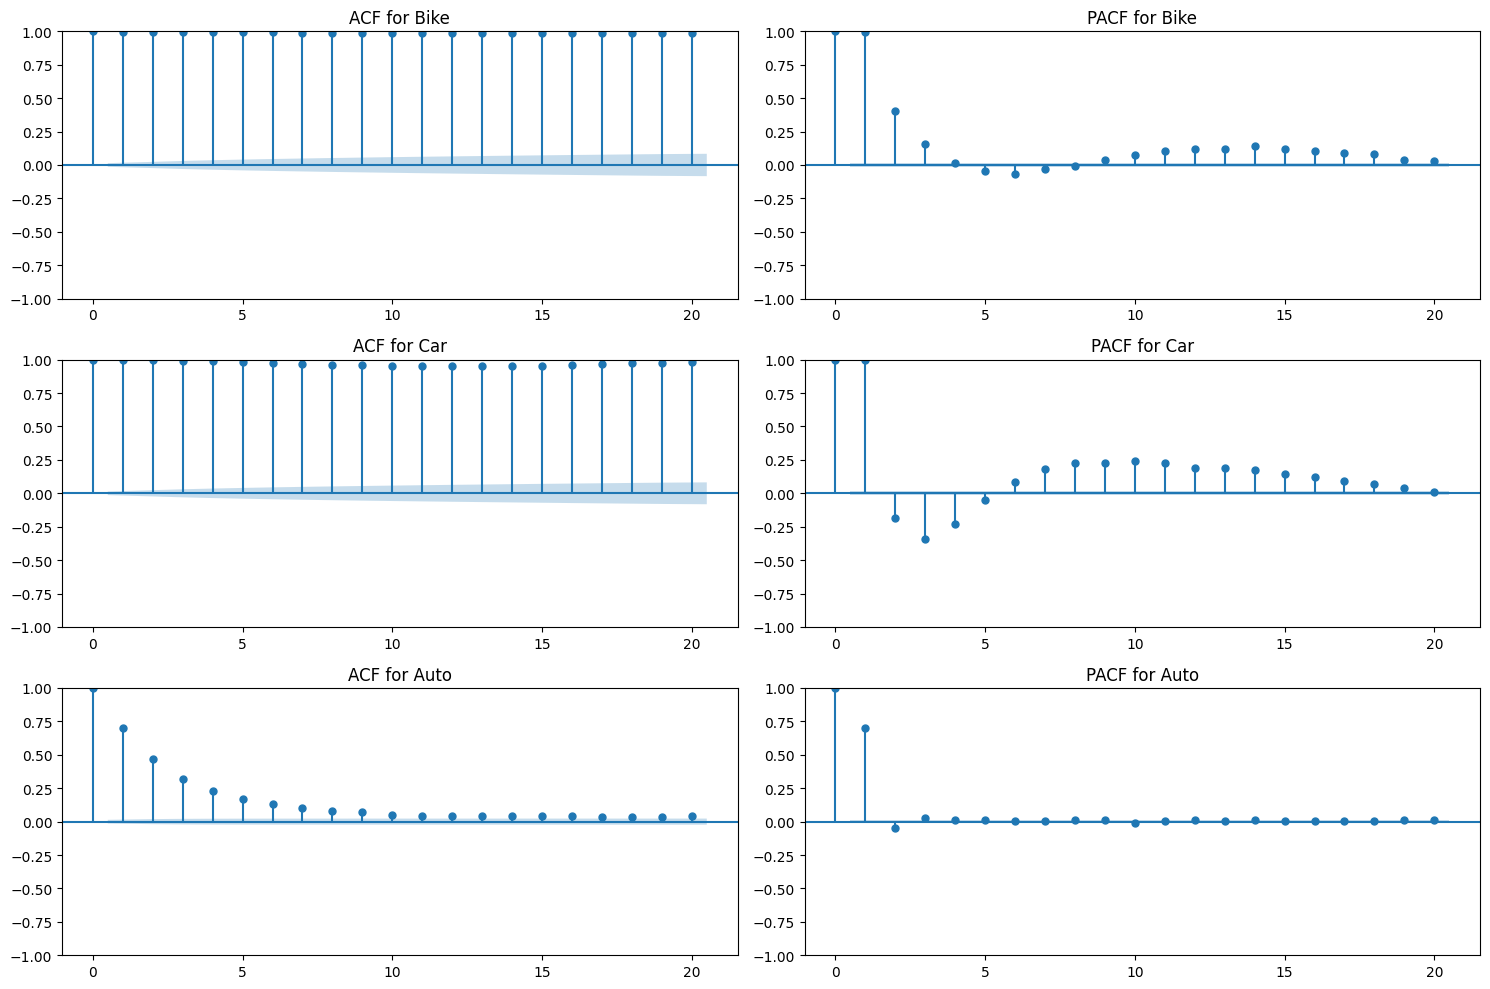

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



def plot_acf_pacf_per_vehicle_type(df):
    vehicle_types = ['vehicle_type_bike', 'vehicle_type_car', 'vehicle_type_auto']
    
    plt.figure(figsize=(15, 10))
    
    for i, vehicle in enumerate(vehicle_types, 1):
        
        df_vehicle = df[df[vehicle] == 1]
        
        
        fare_data = df_vehicle['average_fare'].dropna()
        
       
        if len(fare_data) > 0:
        
            plt.subplot(len(vehicle_types), 2, 2 * i - 1)
            plot_acf(fare_data, lags=20, ax=plt.gca())
            plt.title(f'ACF for {vehicle.replace("vehicle_type_", "").capitalize()}')
            
          
            plt.subplot(len(vehicle_types), 2, 2 * i)
            plot_pacf(fare_data, lags=20, ax=plt.gca())
            plt.title(f'PACF for {vehicle.replace("vehicle_type_", "").capitalize()}')
    
    plt.tight_layout()
    plt.show()


plot_acf_pacf_per_vehicle_type(train)


The above graph shows the ACF and PACF plots of each vehicle type before performing seasonal differencing. The time series for car and bike are non stationary, and hence need to be differenced to achieve stationarity.

Initial ADF  for Car:
ADF Statistic: -1.8619436504858908
p-value: 0.3501702333000294
Critical Values: {'1%': -3.4306620575014812, '5%': -2.8616779187954124, '10%': -2.5668434103459283}
ADF Statistic after Seasonal Differencing for Car: -33.39479311406318
p-value after Seasonal Differencing: 0.0
Critical Values: {'1%': -3.4306624153069025, '5%': -2.8616780769249104, '10%': -2.566843494515316}


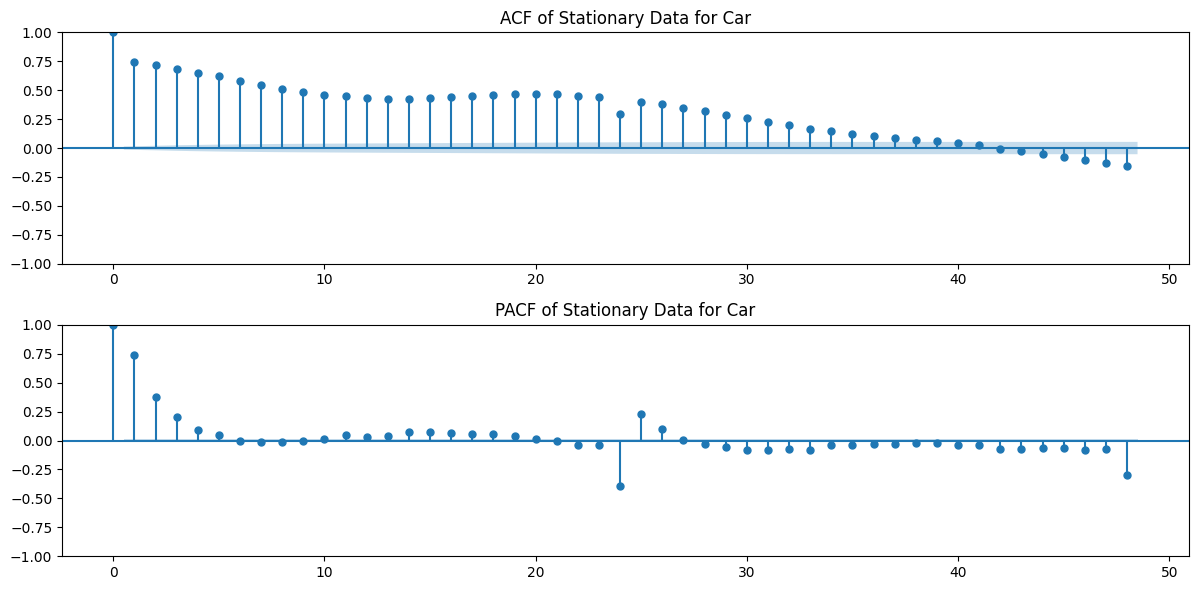

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

car_data = train[train['vehicle_type_car'] == 1].set_index('timestamp')
bike_data = train[train['vehicle_type_bike'] == 1].set_index('timestamp')


initial_adf_result = adfuller(car_data['average_fare'].dropna())
print("Initial ADF  for Car:")
print(f"ADF Statistic: {initial_adf_result[0]}")
print(f"p-value: {initial_adf_result[1]}")
print(f"Critical Values: {initial_adf_result[4]}")

car_data_seasonal_diff = car_data.diff(24).dropna()


adf_result_seasonal_diff = adfuller(car_data_seasonal_diff['average_fare'])
print("ADF Statistic after Seasonal Differencing for Car:", adf_result_seasonal_diff[0])
print("p-value after Seasonal Differencing:", adf_result_seasonal_diff[1])
print("Critical Values:", adf_result_seasonal_diff[4])


plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plot_acf(car_data_seasonal_diff['average_fare'], lags=48, ax=plt.gca())
plt.title("ACF of Stationary Data for Car")


plt.subplot(2, 1, 2)
plot_pacf(car_data_seasonal_diff['average_fare'], lags=48, ax=plt.gca())
plt.title("PACF of Stationary Data for Car")

plt.tight_layout()
plt.show()


From the above plot, it is observed that:
- The ACF plot shows an intial spike at lag 1, and then gradually decreases. This indicates the order of the MA term (q) as 1.
- The PACF plot shows an intial spike at lag 1,2 and then cuts off. This indicates the order of the AR term (p) as 2.
- The data has been differenced once, hence d = 1.

No seasonal spikes have been observed at regular intervals.
It is therefore appropriate to use ARIMAX model.

Initial ADF  for Bike:
ADF Statistic: -1.5575504421726767
p-value: 0.5048745215832674
Critical Values: {'1%': -3.4306620575014812, '5%': -2.8616779187954124, '10%': -2.5668434103459283}
ADF Statistic after Seasonal Differencing for Bike: -24.94556665555356
p-value after Seasonal Differencing: 0.0
Critical Values: {'1%': -3.4306624153069025, '5%': -2.8616780769249104, '10%': -2.566843494515316}


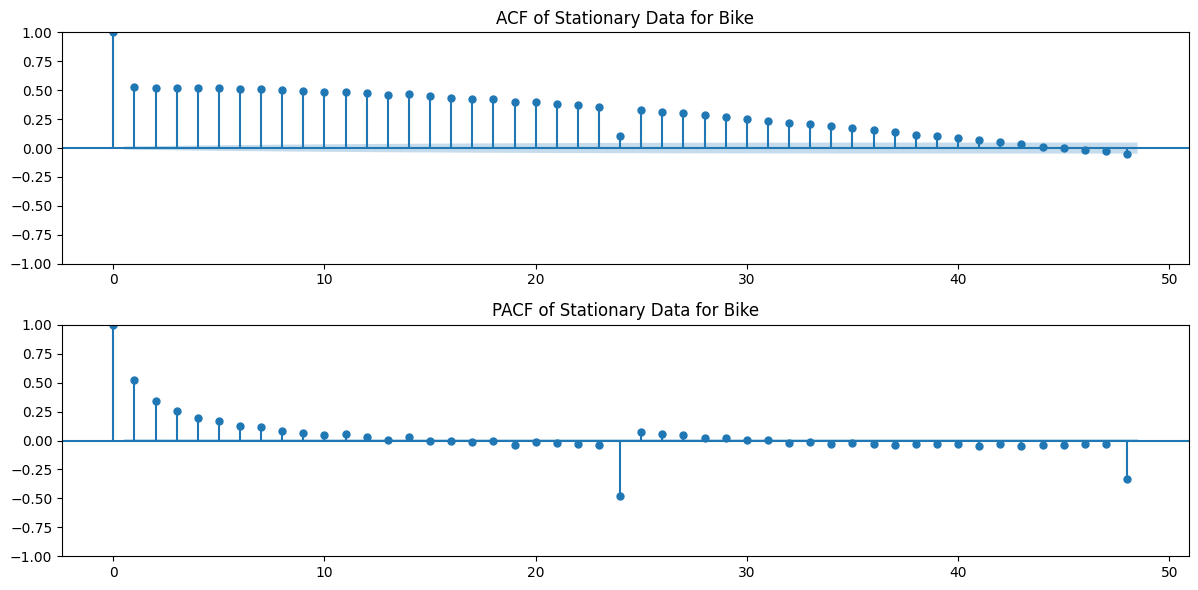

In [14]:
initial_adf_result = adfuller(bike_data['average_fare'].dropna())
print("Initial ADF  for Bike:")
print(f"ADF Statistic: {initial_adf_result[0]}")
print(f"p-value: {initial_adf_result[1]}")
print(f"Critical Values: {initial_adf_result[4]}")

bike_data_seasonal_diff = bike_data.diff(24).dropna()


adf_result_seasonal_diff = adfuller(bike_data_seasonal_diff['average_fare'])
print("ADF Statistic after Seasonal Differencing for Bike:", adf_result_seasonal_diff[0])
print("p-value after Seasonal Differencing:", adf_result_seasonal_diff[1])
print("Critical Values:", adf_result_seasonal_diff[4])


plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plot_acf(bike_data_seasonal_diff['average_fare'], lags=48, ax=plt.gca())
plt.title("ACF of Stationary Data for Bike")


plt.subplot(2, 1, 2)
plot_pacf(bike_data_seasonal_diff['average_fare'], lags=48, ax=plt.gca())
plt.title("PACF of Stationary Data for Bike")

plt.tight_layout()
plt.show()


From the above plot, it is observed that:
- The ACF plot shows an intial spike at lag 1, and then gradually decreases. This indicates the order of the MA term (q) as 1.
- The PACF plot shows an intial spike at lag 1 and then cuts off. This indicates the order of the AR term (p) as 1.
- The data has been differenced once, hence d = 1.

No seasonal spikes have been observed at regular intervals.
It is therefore appropriate to use ARIMAX model.

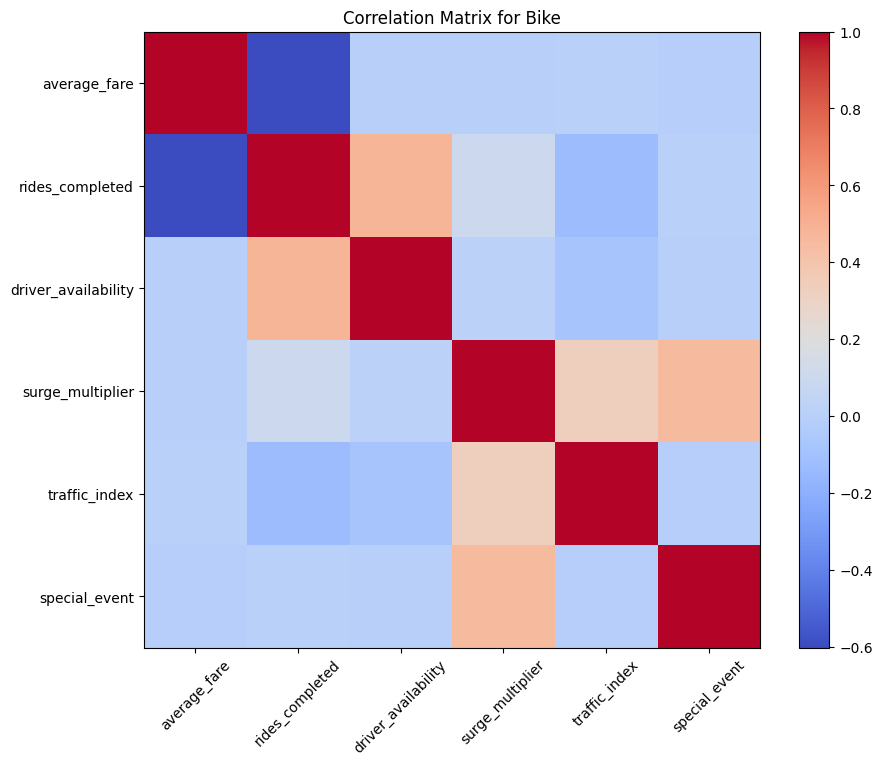

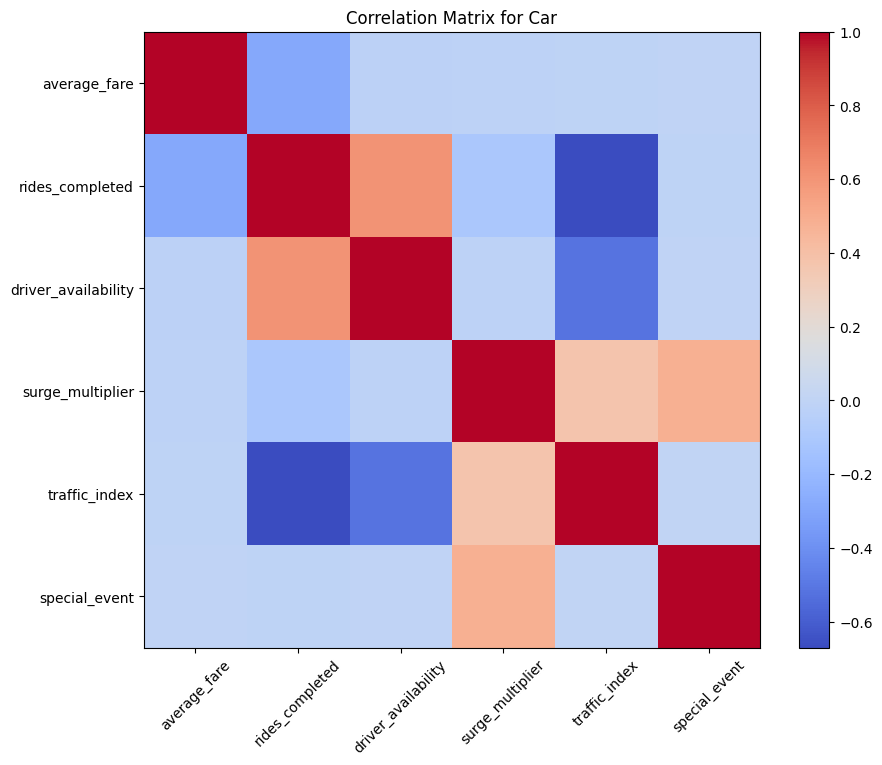

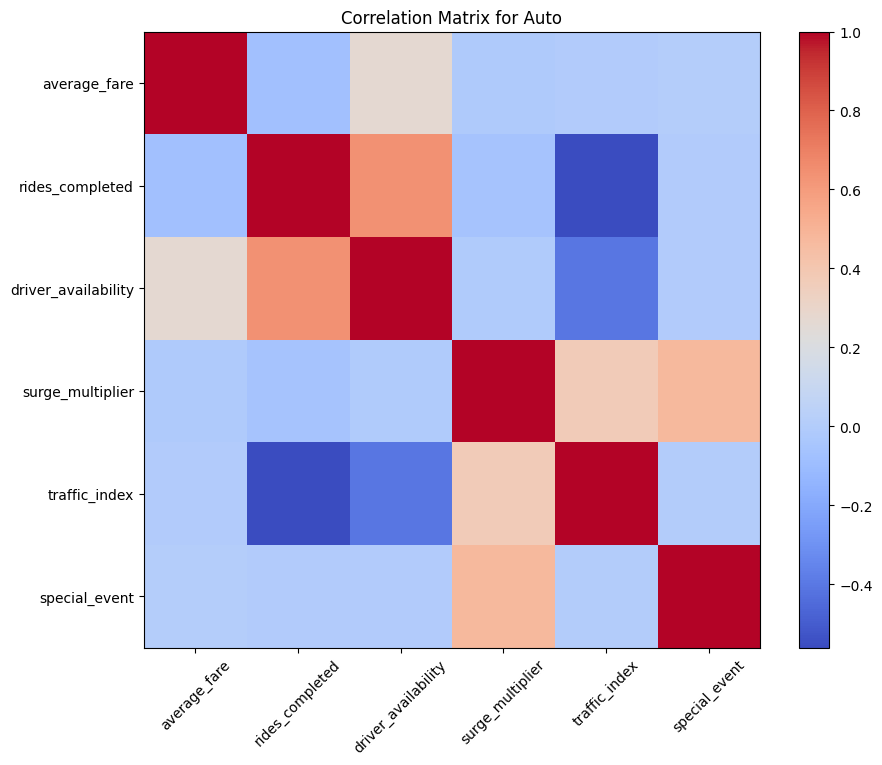

In [15]:
import matplotlib.pyplot as plt

def analyze_vehicle_type(df, vehicle):
    
    vehicle_column = f'vehicle_type_{vehicle}'
    
   
    df_vehicle = df[df[vehicle_column] == 1]

   
    numeric_df_vehicle = df_vehicle[['average_fare','rides_completed', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event']]
    correlation_matrix = numeric_df_vehicle.corr()

    plt.figure(figsize=(10, 8))
    plt.title(f'Correlation Matrix for {vehicle.capitalize()}')
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(numeric_df_vehicle.columns)), numeric_df_vehicle.columns, rotation=45)
    plt.yticks(range(len(numeric_df_vehicle.columns)), numeric_df_vehicle.columns)
    plt.grid(False)
    plt.show()


vehicle_types = ['bike', 'car', 'auto']
for vehicle in vehicle_types:
    analyze_vehicle_type(train, vehicle)


From the above feature engineering process, it has been observed that:
* **BIKE**: Driver availability, Surge Multiplier, traffic index and special event, albeit having low correlation, seem to influence the average fare. rides_completed shows strong negative correlation.
* **CAR**: Similar observations have been made in the case of car, although rides_completed has a slightly lower value of correlation with the average fare for car.
* **AUTO**: Driver availability shows moderate positive correlation with average fare of auto compared to the other features, which still show very little correlation with the average fare like the previous cases.

In [16]:
import pandas as pd


train['hour'] = train['timestamp'].dt.hour
train['day_of_week'] = train['timestamp'].dt.dayofweek
train['month'] = train['timestamp'].dt.month


train['lagged_fare'] = train['average_fare'].shift(1)
train.dropna(inplace=True)  


In [17]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

car_data = train[train['vehicle_type_car'] == 1].set_index('timestamp')

exogenous_vars = ['rides_completed','driver_availability', 'traffic_index']


arimax_model_car = SARIMAX(car_data['average_fare'], 
                                order=(2, 1, 1),  
                                exog=car_data[exogenous_vars] 
                               )

arimax_results_car = arimax_model_car.fit(maxiter=20, disp=False)

print(arimax_results_car.summary())



/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           average_fare   No. Observations:                21005
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -29331.959
Date:                Sat, 02 Nov 2024   AIC                          58677.917
Time:                        08:42:34   BIC                          58733.584
Sample:                    01-01-2021   HQIC                         58696.087
                         - 05-26-2023                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
rides_completed        -0.1766      0.044     -4.002      0.000      -0.263      -0.090
driver_availability     0.0422      0.013      3.130      0.002       0.016       0.069
traffic_index   

* **rides_completed:**
  - **Coefficient:** -0.1581 (p < 0.001) => An increase in the number of completed rides is associated with a decrease in average fare. This suggests that as ride supply increases, fares tend to drop, likely due to higher competition among drivers.

* **driver_availability:**
  - **Coefficient:** 0.0457 (p < 0.001) => Higher driver availability correlates with an increase in average fare. This indicates that when more drivers are available, there may be an increase in demand, allowing fares to rise.

AR and MA Components:

* **ar.L1:** 
  - **Coefficient:** 0.4061 (p < 0.001) => The average fare from the previous period positively influences the current fare, indicating a strong persistence in fare levels.

* **ar.L2:** 
  - **Coefficient:** 0.3392 (p < 0.001) => The fare from two periods ago also has a significant positive effect on the current fare, further emphasizing the trend-following behavior in pricing.

* **ma.L1:** 
  - **Coefficient:** -0.3454 (p < 0.001) => Previous shocks to fare negatively impact the current fare, suggesting that unexpected changes in fare can create downward adjustments in subsequent periods.


The significant negative relationship between completed rides and average fare indicates that increasing the supply of rides can drive fares down, potentially benefiting consumers. Conversely, greater driver availability positively influences fares, indicating that a robust driver network can be leveraged to optimize revenue. The autoregressive components highlight the importance of recent fare trends in forecasting future fares.

In [18]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

bike_data = train[train['vehicle_type_bike'] == 1].set_index('timestamp')

exogenous_vars = ['rides_completed', 'driver_availability', 'surge_multiplier']

arimax_model_bike = SARIMAX(bike_data['average_fare'], 
                             order=(1, 1, 1),  
                             exog=bike_data[exogenous_vars] 
                            )

arimax_results_bike = arimax_model_bike.fit(maxiter=20, disp=False)

print(arimax_results_bike.summary())


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           average_fare   No. Observations:                21004
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -28045.587
Date:                Sat, 02 Nov 2024   AIC                          56103.174
Time:                        08:42:44   BIC                          56150.888
Sample:                    01-01-2021   HQIC                         56118.747
                         - 05-26-2023                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
rides_completed        -0.6113      0.008    -74.792      0.000      -0.627      -0.595
driver_availability     0.7095      0.007    105.074      0.000       0.696       0.723
surge_multiplier

* **rides_completed:**
  - Coefficient: -0.6113 (p < 0.001) => An increase in completed rides is associated with a significant decrease in average fare.

* **driver_availability:**
  - Coefficient: 0.7095 (p < 0.001) => Higher driver availability correlates with a substantial increase in average fare.

* **surge_multiplier:**
  - Coefficient: -0.0440 (p < 0.001) => A higher surge multiplier is linked to a decrease in average fare, indicating potential price reductions during surge periods.

AR and MA Components:

* **ar.L1:** 
  - Coefficient: -0.2095 (p < 0.001) => The last period's fare negatively influences the current fare.
  
* **ma.L1:** 
  - Coefficient: -0.1997 (p < 0.001) => Previous shocks negatively impact current fare, suggesting residual effects from prior pricing.


The model indicates that both completed rides and driver availability significantly impact average fares, with a strong negative relationship between completed rides and fares. Surge multipliers appear to reduce fares, contrary to expectations. The AR and MA components suggest previous fares and shocks affect current prices.

In [19]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

auto_data = train[train['vehicle_type_auto'] == 1].set_index('timestamp')

exogenous_vars = ['rides_completed', 'driver_availability', 'surge_multiplier']

arimax_model_auto = SARIMAX(auto_data['average_fare'], 
                             order=(2, 0, 1),  
                             exog=auto_data[exogenous_vars] 
                            )

arimax_results_auto = arimax_model_auto.fit(maxiter=20, disp=False)

print(arimax_results_auto.summary())


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           average_fare   No. Observations:                21005
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -42774.490
Date:                Sat, 02 Nov 2024   AIC                          85562.981
Time:                        08:43:22   BIC                          85618.648
Sample:                    01-01-2021   HQIC                         85581.150
                         - 05-26-2023                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
rides_completed        -1.8625      0.013   -143.113      0.000      -1.888      -1.837
driver_availability     1.3578      0.013    105.384      0.000       1.333       1.383
surge_multiplier


* **rides_completed:**
  - Coefficient: -1.8625 (p < 0.001) => An increase in completed rides is associated with a significant decrease in average fare, suggesting higher supply might lower fares.

* **driver_availability:**
  - Coefficient: 1.3578 (p < 0.001) => Greater driver availability correlates with a substantial increase in average fare, indicating that more drivers may create competition, thereby increasing pricing.

* **surge_multiplier:**
  - Coefficient: 0.4100 (p < 0.001) => A higher surge multiplier is associated with an increase in average fare, suggesting that surge pricing effectively raises fares during peak demand.

AR and MA Components:

* **ar.L1:** 
  - Coefficient: 0.3036 (p < 0.001) => The last period's fare positively influences the current fare, indicating persistence in pricing.

* **ar.L2:** 
  - Coefficient: 0.6959 (p < 0.001) => The fare from two periods ago also has a strong positive influence, indicating longer-term trends in fare pricing.

* **ma.L1:** 
  - Coefficient: 0.2031 (p < 0.001) => Previous shocks positively impact current fare, suggesting that past disturbances affect ongoing pricing decisions.

The model shows that completed rides significantly decrease average fares, while driver availability and surge multipliers significantly increase them. The AR components indicate that both recent and past fare trends influence current pricing.

We can therefore conclude that the three most important factors determining average fare include:
1) rides_completed
2) driver_availability
3) surge_multiplier

By observing the above data and making models, RideWave coulduse these insights to do the following relating to their operations:

* Identify peak times (e.g., weekends, holidays) for fare spikes, allowing for surge pricing.
* Schedule more drivers during high-demand periods to enhance service availability.
*  Design discounts during off-peak times to stimulate demand.Recognize long-term fare increases to proactively adjust pricing for profitability.Use trend analysis to plan marketing and operational strategies.
*  Identify unexpected fare fluctuations to adjust pricing or driver allocations promptly.
*  Recognize shifts in consumer behavior and market conditions for timely pricing adjustments.


### Task 4: Ensemble Modeling and Pricing Strategy (1 mark)

- Based on your work from previous tasks, analyze the relationships between fares of different vehicle types in Quahog City.
- Develop 3 different sophisticated forecasting models **(one for each vehicle type)**, with appropriate feature engineering for each vehicle type.

You must use the following 3 models for your forecasting:

1. ARIMA / ARIMAX / SARIMA / SARIMAX
2. Any method of your choice
3.  Any method of your choice that is NOT in the following list: Holt Winter's, ARIMA, ARIMAX, SARIMA, SARIMAX
   


Here are some models you can consider:
1) ARCH (https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)
2) GARCH (https://www.investopedia.com/terms/g/garch.asp)
3) VAR (https://en.wikipedia.org/wiki/Vector_autoregression#:~:text=VAR%20is%20a%20type%20of,economics%20and%20the%20natural%20sciences.)
4) XGBoost (https://en.wikipedia.org/wiki/XGBoost)

Explain the rationale behind your choice of model for the corresponding vehicle type.

RideWave are looking to create a unified model incorporating all 3 of the models you have developed.
- How would you go about implementing an ensemble modelling approach using all 3 models? 
##### (You don't have to write code for this, but the explanation must be detailed)





In [20]:



import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor

import warnings

warnings.filterwarnings("ignore")


In [21]:


train['timestamp'] = pd.to_datetime(train['timestamp'])


train['hour'] = train['timestamp'].dt.hour
train['day_of_week'] = train['timestamp'].dt.dayofweek
train['month'] = train['timestamp'].dt.month
train.dropna(inplace=True)  


Initial ADF Test:
ADF Statistic: -1.8619436504858908
p-value: 0.3501702333000294
Critical Values: {'1%': -3.4306620575014812, '5%': -2.8616779187954124, '10%': -2.5668434103459283}
ADF Statistic after Seasonal Differencing: -33.39479311406318
p-value after Seasonal Differencing: 0.0
Critical Values: {'1%': -3.4306624153069025, '5%': -2.8616780769249104, '10%': -2.566843494515316}


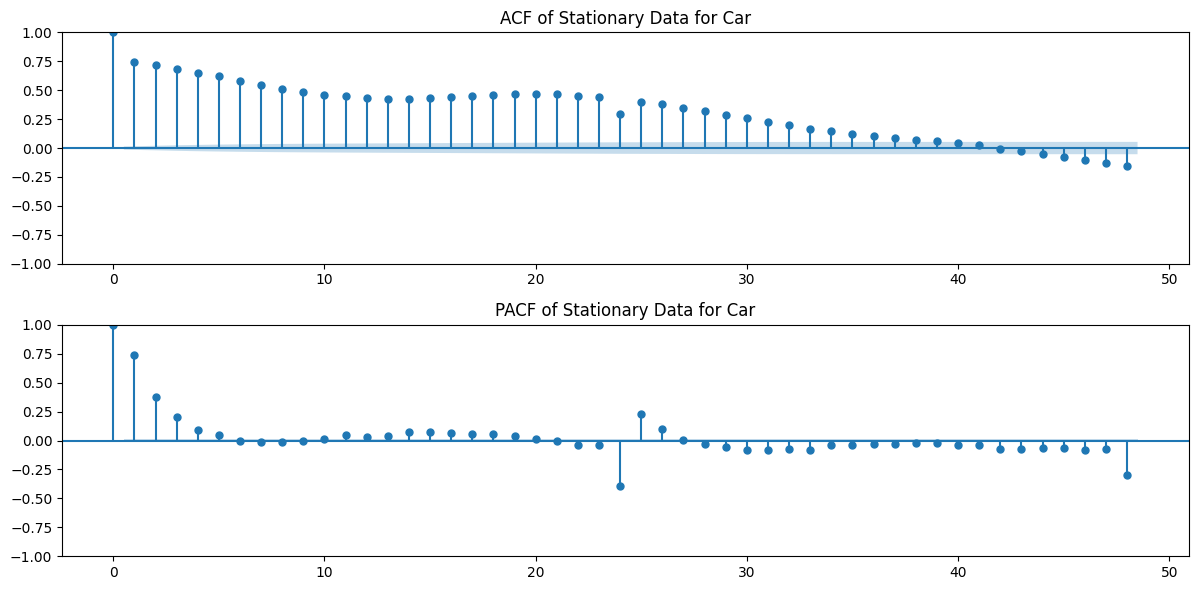

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



car_data = train[train['vehicle_type_car'] == 1].set_index('timestamp')


initial_adf_result = adfuller(car_data['average_fare'].dropna())
print("Initial ADF Test:")
print(f"ADF Statistic: {initial_adf_result[0]}")
print(f"p-value: {initial_adf_result[1]}")
print(f"Critical Values: {initial_adf_result[4]}")


car_data_seasonal_diff = car_data.diff(24).dropna()


adf_result_seasonal_diff = adfuller(car_data_seasonal_diff['average_fare'])
print("ADF Statistic after Seasonal Differencing:", adf_result_seasonal_diff[0])
print("p-value after Seasonal Differencing:", adf_result_seasonal_diff[1])
print("Critical Values:", adf_result_seasonal_diff[4])


plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plot_acf(car_data_seasonal_diff['average_fare'], lags=48, ax=plt.gca())
plt.title("ACF of Stationary Data for Car")


plt.subplot(2, 1, 2)
plot_pacf(car_data_seasonal_diff['average_fare'], lags=48, ax=plt.gca())
plt.title("PACF of Stationary Data for Car")

plt.tight_layout()
plt.show()


The output above provides insigths into the time-series analysis of the average_fare data for car rides in Quahog City, focusing wheter the series is stationary.

AS we see initial ADF test statistic is -1.86, with a p-value of 0.35. The p-value being greater than 0.05 suggests that the time series is non-stationary, which means it has trends or seasonality.

This result implies that the average_fare data changes over time in ways that are not purely random,

We performed a seasonal differencing step by subtracting the data from 24 hours ago. 

This helps remove daily patterns, making the data more stable over time.After seasonal differencing, the ADF statistic is -33.39, and the p-value is 0.0. With a p-value less than 0.05, we can confidently say the data is now stationary.

ACF AND PACF plots:
Peaks in these plots represent significant lags that influence the current value, which is useful for deciding on model parameters.

Based on these observations ,we decided to usw the following models:
Holt-Winters for Car (Non-Stationary Data): This method effectively captures seasonality and trends in time series data. Given the influence of seasonal patterns on car fares, Holt-Winters accommodates these fluctuations, making it suitable for non-stationary data.

ARIMAX for Bike (Non-Stationary Data): The ARIMAX model handles non-stationarity and allows for the inclusion of exogenous variables. This is beneficial for bike fares, as it accounts for external factors (like rides completed and driver availability) that influence average fare while stabilizing variance through differencing.

XGBoost for Auto (Stationary Data): XGBoost is a robust machine learning algorithm ideal for stationary data. Since auto fares may not exhibit strong trends or seasonality, XGBoost effectively captures complex relationships in the data using various features, enhancing predictive performance.

In [23]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing


car_data = train[train['vehicle_type_car'] == 1].set_index('timestamp')['average_fare']
test_car = test[test['vehicle_type_car'] == 1].set_index('timestamp')


holt_winters_model_car = ExponentialSmoothing(
    car_data,
    trend="add",           
    seasonal="add",        
    seasonal_periods=24   
)


holt_winters_fit_car = holt_winters_model_car.fit()


forecast_horizon = len(test_car)
average_fare_car_forecast = holt_winters_fit_car.forecast(steps=forecast_horizon)


car_df = pd.DataFrame({
    'timestamp': test_car.index,
    'avg_fare_car': average_fare_car_forecast
})


print(car_df)


                              timestamp  avg_fare_car
2023-05-26 05:00:00 2023-05-26 05:00:00    159.071836
2023-05-26 06:00:00 2023-05-26 06:00:00    159.221731
2023-05-26 07:00:00 2023-05-26 07:00:00    159.073799
2023-05-26 08:00:00 2023-05-26 08:00:00    158.665360
2023-05-26 09:00:00 2023-05-26 09:00:00    158.025710
...                                 ...           ...
2023-12-30 20:00:00 2023-12-30 20:00:00    168.143223
2023-12-30 21:00:00 2023-12-30 21:00:00    168.716626
2023-12-30 22:00:00 2023-12-30 22:00:00    169.534674
2023-12-30 23:00:00 2023-12-30 23:00:00    170.481066
2023-12-31 00:00:00 2023-12-31 00:00:00    171.511219

[5252 rows x 2 columns]


In [24]:
holt_winters_fit_car.summary()

Dep. Variable:,average_fare,No. Observations:,21005
Model:,ExponentialSmoothing,SSE,11689.960
Optimized:,True,AIC,-12253.562
Trend:,Additive,BIC,-12030.892
Seasonal:,Additive,AICC,-12253.474
Seasonal Periods:,24,Date:,"Sat, 02 Nov 2024"
Box-Cox:,False,Time:,08:43:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5712068,alpha,True
smoothing_trend,9.4507e-06,beta,True



Sample forecast values are shown, with the average_fare expected to range between approximately 159 and 171 over the forecasted period from May 26, 2023, to December 31, 2023.

The Holt-Winters Exponential Smoothing model demonstrates superior capability to capture the dynamics of average fare data, as evidenced by the low SSE of 11,689.96, indicating a strong fit to the observations.
The AIC and BIC values (-12,253.562 and -12,030.892, respectively) suggest a well-optimized model with low complexity.
The smoothing level coefficient of approximately 0.57 indicates a moderate reliance on recent observations, implying that the model adapts reasonably well to changes in fare trends.
The extremely low values for the trend and seasonal smoothing parameters indicate minimal adjustment in these components, suggesting that while the model considers seasonality, it does not perceive significant trends in the data.
Specifically, some hours (e.g., s.1 and s.2) show significantly higher seasonal effects, indicating peak demand times, whereas other hours exhibit lower seasonal adjustments, suggesting off-peak pricing.


Initial ADF Test:
ADF Statistic: -1.5475636135218367
p-value: 0.5098649729915532
Critical Values: {'1%': -3.4306620723936763, '5%': -2.86167792537691, '10%': -2.5668434138491367}
ADF Statistic after Seasonal Differencing: -24.947695257553615
p-value after Seasonal Differencing: 0.0
Critical Values: {'1%': -3.430662430233269, '5%': -2.8616780835215088, '10%': -2.5668434980265626}


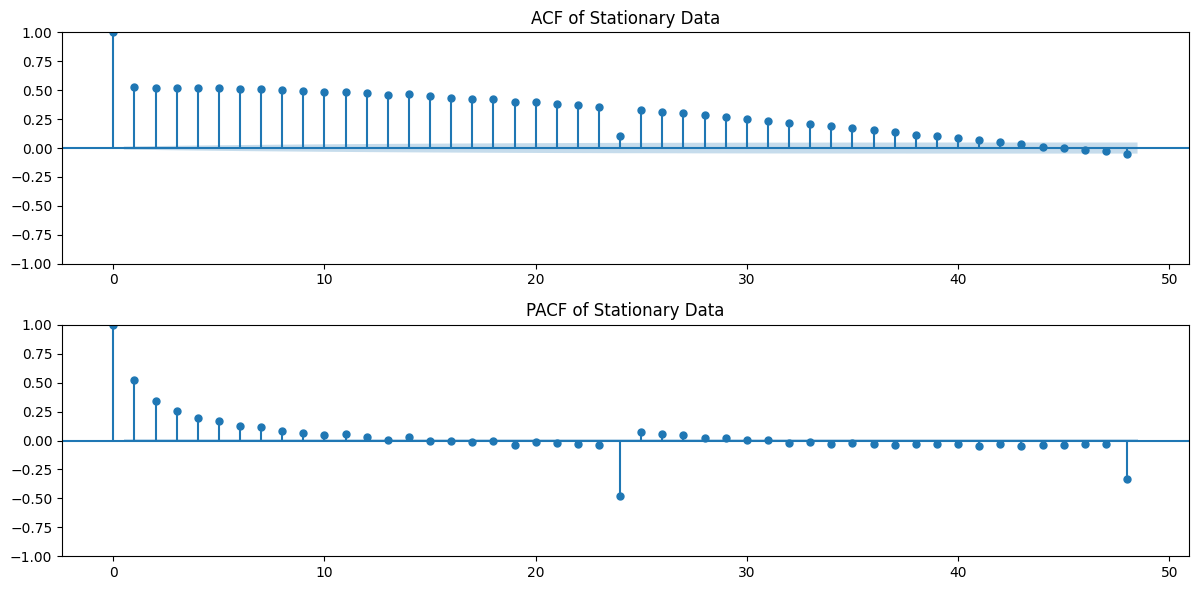

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


bike_data = train[train['vehicle_type_bike'] == 1].set_index('timestamp')
initial_adf_result = adfuller(bike_data['average_fare'].dropna())
print("Initial ADF Test:")
print(f"ADF Statistic: {initial_adf_result[0]}")
print(f"p-value: {initial_adf_result[1]}")
print(f"Critical Values: {initial_adf_result[4]}")


bike_data_seasonal_diff = bike_data.diff(24).dropna()

adf_result_seasonal_diff = adfuller(bike_data_seasonal_diff['average_fare'])
print("ADF Statistic after Seasonal Differencing:", adf_result_seasonal_diff[0])
print("p-value after Seasonal Differencing:", adf_result_seasonal_diff[1])
print("Critical Values:", adf_result_seasonal_diff[4])


plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plot_acf(bike_data_seasonal_diff['average_fare'], lags=48, ax=plt.gca())
plt.title("ACF of Stationary Data")


plt.subplot(2, 1, 2)
plot_pacf(bike_data_seasonal_diff['average_fare'], lags=48, ax=plt.gca())
plt.title("PACF of Stationary Data")

plt.tight_layout()
plt.show()


The output above provides insigths into the time-series analysis of the average_fare data for bike rides in Quahog City, focusing wheter the series is stationary.

AS we see initial ADF test statistic is -1.54, with a p-value of 0.5. The p-value being greater than 0.05 suggests that the time series is non-stationary, which means it has trends or seasonality.

This result implies that the average_fare data changes over time in ways that are not purely random,

We performed a seasonal differencing step by subtracting the data from 24 hours ago. 

This helps remove daily patterns, making the data more stable over time.After seasonal differencing, the ADF statistic is -33.39, and the p-value is 0.0. With a p-value less than 0.05, we can confidently say the data is now stationary.

ACF AND PACF plots:
Peaks in these plots represent significant lags that influence the current value, which is useful for deciding on model parameters.

In [26]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX


bike_data = train[train['vehicle_type_bike'] == 1]

if len(bike_data) > 0:
   
    arimax_model_bike = SARIMAX(bike_data['average_fare'], 
                order=(1, 1, 1), 
                exog=bike_data[['rides_completed', 'driver_availability',
       'surge_multiplier']])

    arimax_results_bike = arimax_model_bike.fit(maxiter=20)  


print(arimax_results_bike.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33735D+00    |proj g|=  4.55942D-02


 This problem is unconstrained.



At iterate    5    f=  1.33527D+00    |proj g|=  6.14433D-03

At iterate   10    f=  1.33525D+00    |proj g|=  5.20499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     13      1     0     0   1.825D-06   1.335D+00
  F =   1.3352498009099676     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:           average_fare   No. Observations:                21004
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -28045.587
Date:                Sat, 02 Nov 2024   AIC                   

### We also build a ARIMAX model to predict the avg bike fares.

The model converged successfully, indicated by the norm of the projected gradient being less than the tolerance level, reflecting stability in the optimization process. 

rides_completed: The coefficient of -0.6113 indicates a strong negative relationship between the number of rides completed and the average fare. This implies that as the number of rides increases, the average fare tends to decrease, likely due to competitive pricing in higher-volume scenarios.

driver_availability: With a coefficient of 0.7095, this variable has a significant positive effect on average fare. An increase in driver availability likely leads to a higher average fare, suggesting that more available drivers can influence pricing positively, potentially due to increased service levels or demand.

surge_multiplier: The coefficient of -0.0440 indicates a negative relationship, meaning higher surge multipliers are associated with lower average fares. This might suggest that during surge pricing, the fares do not increase proportionally, potentially indicating market saturation or competitive pricing strategies.

AIC (Akaike Information Criterion): The AIC value for the ARIMAX model is 56103.174.  This means that the model is reasonably well-suited to the data while maintaining simplicity.

BIC (Bayesian Information Criterion): The BIC value is 56150.888, a higher BIC compared to AIC indicates that while the model fits well, there may be considerations for further reducing complexity without sacrificing accuracy.

The ARIMAX model effectively captures the dynamics of average fare, revealing critical insights into how various predictors impact fare pricing.
The strong negative effect of completed rides and the positive impact of driver availability underscore the competitive nature of fare pricing in the ridesharing market.
The model's reliance on AR and MA components suggests that historical patterns are crucial for forecasting average fare.



In [27]:

test_bike = test[test['vehicle_type_bike'] == 1].copy()
test_bike['timestamp'] = pd.to_datetime(test_bike['timestamp'])


forecast_steps = len(test_bike)
exog_variables = test_bike[['rides_completed', 'driver_availability',
       'surge_multiplier']]

arimax_forecast_bike = arimax_results_bike.get_forecast(steps=forecast_steps, exog=exog_variables)
arimax_pred_bike = arimax_forecast_bike.predicted_mean


bike_df = pd.DataFrame({
    'timestamp': test_bike['timestamp'].values,  
    'avg_fare_bike': arimax_pred_bike
})


print(bike_df)


                timestamp  avg_fare_bike
21004 2023-05-26 05:00:00      82.866554
21005 2023-05-26 06:00:00      82.011013
21006 2023-05-26 07:00:00      82.336702
21007 2023-05-26 08:00:00      83.006611
21008 2023-05-26 09:00:00      83.764065
...                   ...            ...
26251 2023-12-30 20:00:00      81.327630
26252 2023-12-30 21:00:00      82.870802
26253 2023-12-30 22:00:00      82.247670
26254 2023-12-30 23:00:00      82.438072
26255 2023-12-31 00:00:00      81.417896

[5252 rows x 2 columns]


forecast values indicate an expected average fare between approximately 81 and 83 over the forecasted period from May 26, 2023, to December 31, 2023.

In [28]:
import pandas as pd
import xgboost as xgb


auto_data = train[train['vehicle_type_auto'] == 1]


X = auto_data[['rides_completed', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event']]
y = auto_data['average_fare']


dtrain = xgb.DMatrix(X, label=y)


params = {
    'objective': 'reg:squarederror',  
    'max_depth': 6,                    
    'learning_rate': 0.1,              
    'n_estimators': 100,               
}


xgboost_model = xgb.train(params, dtrain, num_boost_round=100)


test_auto_data = test[test['vehicle_type_auto'] == 1]


X_test = test_auto_data[['rides_completed', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event']]
dtest = xgb.DMatrix(X_test)


predictions = xgboost_model.predict(dtest)


auto_df = pd.DataFrame({
    'timestamp': test_auto_data['timestamp'].values,  
    'avg_fare_auto': predictions
})


print(auto_df)


               timestamp  avg_fare_auto
0    2023-05-26 05:00:00      41.961845
1    2023-05-26 06:00:00      41.760265
2    2023-05-26 07:00:00      40.561050
3    2023-05-26 08:00:00      41.895370
4    2023-05-26 09:00:00      43.223534
...                  ...            ...
5247 2023-12-30 20:00:00      42.703510
5248 2023-12-30 21:00:00      43.315434
5249 2023-12-30 22:00:00      40.477436
5250 2023-12-30 23:00:00      41.087841
5251 2023-12-31 00:00:00      41.044388

[5252 rows x 2 columns]


We also used XGB model to predict the average fare for auto rides.

The features selected for this analysis include the number of rides completed, driver availability, surge multipliers, traffic index, and whether there are any special events. The target variable we aimed to predict is the average_fare.

forecast values indicate that the average fare for auto rides is expected to range from approximately 40 to 43 over the forecasted period from May 26, 2023, to December 31, 2023.


## ENSEMBLE MODELING:
We can do the following to build an ensemble model for RideWave by amalgamating Holt-Winters, ARIMAX, and XGBoost models.

1. **Prediction Generation**: Fetch the prediction of each model, be it Holt-Winters on car, ARIMAX on bike, and XGBoost on auto from both training and test sets.

2. **Selection of Ensemble Method**:
- **Weighted Average**: Assign weights based on the performance of different models (e.g., based on RMSE values). Then, perform weighted sum to generate the overall prediction:
Final Prediction = w1 · Holt-Winters + w2 · ARIMAX + w3 · XGBoost

- **Stacking**: Use predictions of each model as inputs of a meta-model (eg. linear regression) learns to optimally combine the predictions.

3. **Tune and Validate**: Use cross-validation for optimizing model weights or tune the meta-model. Finally, evaluate the performance in terms of metrics like RMSE to ensure the overall performance is accurate on all vehicles.

4. **Deploy and Monitor**: Deploy the ensemble in production and track its performance over time; periodically adjust the weights or retrain as necessary due to changes in data.

This would allow RideWave to leverage the uniqueness of strengths in each model in creating a strong, combined prediction for all kinds of vehicles.

## Example submission, just for your reference

In [29]:
submission = pd.DataFrame()



## We have used a sample-submission just to show you the format your submission should be in, you have to use your OWN forecasts while making submissions


In [30]:
submission['timestamp'] = bike_df['timestamp'].values 
submission['average_fare_bike'] = bike_df['avg_fare_bike'].values  
submission['average_fare_auto'] =auto_df['avg_fare_auto'].values  
submission['average_fare_car'] = car_df['avg_fare_car'].values  


In [31]:

submission.head()

,timestamp,average_fare_bike,average_fare_auto,average_fare_car
0,2023-05-26 05:00:00,82.866554,41.961845,159.071836
1,2023-05-26 06:00:00,82.011013,41.760265,159.221731
2,2023-05-26 07:00:00,82.336702,40.561050,159.073799
3,2023-05-26 08:00:00,83.006611,41.895370,158.665360
4,2023-05-26 09:00:00,83.764065,43.223534,158.025710


In [32]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5252 entries, 0 to 5251
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          5252 non-null   datetime64[ns]
 1   average_fare_bike  5252 non-null   float64       
 2   average_fare_auto  5252 non-null   float32       
 3   average_fare_car   5252 non-null   float64       
dtypes: datetime64[ns](1), float32(1), float64(2)
memory usage: 143.7 KB


In [33]:
submission.to_csv('submission.csv', index = False)

## Congratulations! 🎉

You've done it! You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-2, and that's something to be truly proud of! This achievement shows just how much you've grown in your ability to tackle time-series modeling and analysis.

### Here’s what you’ve accomplished:
- You applied data analytics concepts to solve real-world problems.
- You developed time-series models, a skill that’s essential in fields like finance (think stock predictions) and healthcare (monitoring vitals)—and many more!

### What's next:
With this experience, you’ve laid a solid foundation for real-world data modeling and time-series analysis. The techniques you’ve mastered here will be incredibly valuable in many data science and machine learning projects, no matter the industry.

But remember, this is just the start of your journey in data science! Keep learning, keep pushing yourself, and most importantly, keep having fun with it. You're ready for even more exciting and challenging projects.

**Huge congrats once again, and wishing you all the best for your ISAs and ESAs! You've got this! 🌟** 